# Historical Stock Market Analysis

### What is EDA?
Exploratory Data Analysis (EDA) is the process of analyzing, summarizing, and visualizing data to uncover patterns, trends, relationships, and anomalies before applying advanced modeling techniques. It helps in:

1) Identify the main characteristics of the data.
2) identifying trends, outliers, and patterns.
3) Testing assumptions and generating insights for informed decision-making.

This project focuses on analyzing the stock market trends of multiple Indian companies, including Tata Motors, Maruti Suzuki, HDFC Bank, and more. The goal is to identify patterns, correlations, and trends that help in stock price forecasting.

### Data Extraction (SQL)
- The first step in my analysis was data extraction using SQL.
- I stored and managed my stock market data in a SQL database.
- Using SQL queries, I extracted relevant columns such as date, open price, close price, high, low, volume, and 52-week highs/lows for each company.

##### Understanding the Dataset: The dataset contains essential stock market data, including: 
-  Date – The trading date for each stock.
- Open, High, Low, Close Prices – Stock price movements throughout the day.
- Volume – The number of shares traded. 
- VWAP (Volume Weighted Average Price) – The average price based on trading volume. 
- No. of Trades – Total number of transactions per day. 
- 52-Week High & Low – The highest and lowest stock prices in the last year.
- Prev. Close: Closing price of the stock on the previous trading day.

### Tools for EDA: Pandas, Matplotlib, Seaborn, Plotly.

#### Importing Required Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

This imports essential libraries for data manipulation (pandas) and visualization (matplotlib, seaborn).

#### Installing MySQL Connector

In [10]:
# !pip install mysql-connector-python pandas

#### Connecting to MySQL Database

In [12]:
import mysql.connector
import pandas as pd

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",      # 
    user="root",           # MySQL username
    password="admin",  #  MySQL password
    database="stock_market"   # database name
)

# Create a cursor
cursor = conn.cursor()

Establishes a connection to the MySQL database named "stock_market".

# TataMotors

#### Reading Data from MySQL into a Pandas DataFrame

In [16]:
# Read SQL table into Pandas DataFrame
query = "SELECT * FROM tatamotors_data1;"  
tatamotor = pd.read_sql(query, conn)
tatamotor

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,982.5,999.90,979.00,978.65,995.00,992.80,989.41,"1,065.60",400.45,"98,62,996","9,75,85,05,417.60","2,06,461"
1,27-Mar-24,EQ,991.6,995.00,976.70,986.20,979.85,978.65,986.05,"1,065.60",400.45,"66,40,537","6,54,79,01,957.20","1,53,746"
2,26-Mar-24,EQ,977.0,995.00,976.00,979.80,987.15,986.20,988.47,"1,065.60",400.45,"94,61,531","9,35,24,25,727.35","2,03,693"
3,22-Mar-24,EQ,964.9,986.20,950.35,964.90,979.75,979.80,973.11,"1,065.60",400.45,"1,36,38,296","13,27,15,35,879.30","3,31,701"
4,21-Mar-24,EQ,951.0,969.25,946.00,940.45,965.55,964.90,959.70,"1,065.60",400.45,"1,10,74,207","10,62,78,71,292.80","2,55,104"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,06-Apr-18,EQ,362.0,368.35,356.45,362.20,363.40,364.10,363.14,488.25,324.30,"1,32,97,051","4,82,87,23,402.10","1,09,844"
1489,05-Apr-18,EQ,362.6,372.35,359.80,355.60,362.00,362.20,366.90,488.25,324.30,"2,88,86,070","10,59,83,14,945.20","1,69,067"
1490,04-Apr-18,EQ,346.8,363.70,346.25,343.10,354.80,355.60,358.29,488.25,324.30,"2,71,57,199","9,73,00,31,285.75","2,43,264"
1491,03-Apr-18,EQ,338.4,344.50,337.15,339.15,342.45,343.10,342.11,488.25,324.30,"69,89,584","2,39,11,98,986.10","81,593"


### Data Preprocessing
Before performing EDA, we hace to clean our dataset:

- Handling missing values using mean/median imputation
- Converting date columns to proper datetime format
- Removing duplicates and inconsistencies

#### Checking Data Shape

In [19]:
tatamotor.shape

(1493, 14)

Returns the number of rows and columns in the dataset.

#### Displaying Dataset Information

In [22]:
tatamotor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1493 non-null   object 
 1   series        1493 non-null   object 
 2   OPEN          1493 non-null   float64
 3   HIGH          1493 non-null   float64
 4   LOW           1493 non-null   float64
 5   PREV. CLOSE   1493 non-null   float64
 6   ltp           1493 non-null   float64
 7   close         1493 non-null   float64
 8   vwap          1493 non-null   float64
 9   52W H         1493 non-null   object 
 10  52W L         1493 non-null   float64
 11  VOLUME        1493 non-null   object 
 12  VALUE         1493 non-null   object 
 13  No of trades  1493 non-null   object 
dtypes: float64(8), object(6)
memory usage: 163.4+ KB


Shows column names, data types, and missing values.

#### Basic Statistical Summary

In [25]:
tatamotor.describe()

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W L
count,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000
mean,338.198794,342.864334,332.878265,337.165506,337.660750,337.613563,337.946986,204.521936
std,196.948716,198.552643,195.151681,196.115963,196.972233,196.885355,196.903477,119.780845
min,66.500000,66.900000,63.500000,65.300000,65.450000,65.300000,65.500000,63.500000
25%,172.750000,175.950000,169.250000,172.300000,172.200000,172.300000,172.710000,106.000000
50%,307.700000,312.250000,303.200000,307.700000,307.650000,307.700000,308.280000,156.700000
75%,447.600000,453.800000,441.050000,446.750000,446.800000,447.050000,448.470000,324.300000
max,993.250000,999.900000,981.550000,988.350000,995.000000,992.800000,989.410000,400.450000


Provides statistics like mean, median, standard deviation, etc., for numerical columns.

#### Checking for Duplicates

In [28]:
tatamotor.duplicated().sum()

12

##### Displaying Duplicate Rows

In [30]:
tatamotor[tatamotor.duplicated()]

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
1005,04-Mar-20,EQ,129.60,129.6,120.55,130.35,126.4,126.20,124.90,239.35,106.0,"9,75,46,902","12,18,36,11,418.40","2,94,498"
1006,04-Mar-20,EQ,129.60,129.6,120.55,130.35,126.4,126.20,124.90,239.35,106.0,"9,75,46,902","12,18,36,11,418.40","2,94,498"
1007,04-Mar-20,EQ,129.60,129.6,120.55,130.35,126.4,126.20,124.90,239.35,106.0,"9,75,46,902","12,18,36,11,418.40","2,94,498"
1008,04-Mar-20,EQ,129.60,129.6,120.55,130.35,126.4,126.20,124.90,239.35,106.0,"9,75,46,902","12,18,36,11,418.40","2,94,498"
1010,03-Mar-20,EQ,127.50,131.4,125.25,125.40,130.4,130.35,127.87,239.35,106.0,"8,67,65,576","11,09,49,77,773.95","2,87,946"
1011,03-Mar-20,EQ,127.50,131.4,125.25,125.40,130.4,130.35,127.87,239.35,106.0,"8,67,65,576","11,09,49,77,773.95","2,87,946"
1012,03-Mar-20,EQ,127.50,131.4,125.25,125.40,130.4,130.35,127.87,239.35,106.0,"8,67,65,576","11,09,49,77,773.95","2,87,946"
1013,03-Mar-20,EQ,127.50,131.4,125.25,125.40,130.4,130.35,127.87,239.35,106.0,"8,67,65,576","11,09,49,77,773.95","2,87,946"
1022,19-Feb-20,EQ,162.85,164.6,153.05,161.60,158.1,158.05,157.33,239.35,106.0,"7,89,14,233","12,41,54,30,958.40","3,21,799"
1023,19-Feb-20,EQ,162.85,164.6,153.05,161.60,158.1,158.05,157.33,239.35,106.0,"7,89,14,233","12,41,54,30,958.40","3,21,799"


#### Removing Duplicates

In [32]:
tatamotor = tatamotor.drop_duplicates(keep='first')
tatamotor

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,982.5,999.90,979.00,978.65,995.00,992.80,989.41,"1,065.60",400.45,"98,62,996","9,75,85,05,417.60","2,06,461"
1,27-Mar-24,EQ,991.6,995.00,976.70,986.20,979.85,978.65,986.05,"1,065.60",400.45,"66,40,537","6,54,79,01,957.20","1,53,746"
2,26-Mar-24,EQ,977.0,995.00,976.00,979.80,987.15,986.20,988.47,"1,065.60",400.45,"94,61,531","9,35,24,25,727.35","2,03,693"
3,22-Mar-24,EQ,964.9,986.20,950.35,964.90,979.75,979.80,973.11,"1,065.60",400.45,"1,36,38,296","13,27,15,35,879.30","3,31,701"
4,21-Mar-24,EQ,951.0,969.25,946.00,940.45,965.55,964.90,959.70,"1,065.60",400.45,"1,10,74,207","10,62,78,71,292.80","2,55,104"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,06-Apr-18,EQ,362.0,368.35,356.45,362.20,363.40,364.10,363.14,488.25,324.30,"1,32,97,051","4,82,87,23,402.10","1,09,844"
1489,05-Apr-18,EQ,362.6,372.35,359.80,355.60,362.00,362.20,366.90,488.25,324.30,"2,88,86,070","10,59,83,14,945.20","1,69,067"
1490,04-Apr-18,EQ,346.8,363.70,346.25,343.10,354.80,355.60,358.29,488.25,324.30,"2,71,57,199","9,73,00,31,285.75","2,43,264"
1491,03-Apr-18,EQ,338.4,344.50,337.15,339.15,342.45,343.10,342.11,488.25,324.30,"69,89,584","2,39,11,98,986.10","81,593"


#### Checking for Missing values

In [34]:
tatamotor.isnull().sum()

Date            0
series          0
OPEN            0
HIGH            0
LOW             0
PREV. CLOSE     0
ltp             0
close           0
vwap            0
52W H           0
52W L           0
VOLUME          0
VALUE           0
No of trades    0
dtype: int64

# MarutiSuzuki

In [36]:
query = "SELECT * FROM marutisuzuki_data1;" 
maruti = pd.read_sql(query, conn)
maruti

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,"12,569.95","12,726.80","12,385.50","12,510.35","12,607.00","12,600.35","12,581.50","12,726.80","8,140.00","8,60,324","10,82,41,66,248.25","1,40,600"
1,27-Mar-24,EQ,"12,290.00","12,722.70","12,285.70","12,250.55","12,560.00","12,510.35","12,558.32","12,722.70","8,140.00","8,78,986","11,03,85,84,403.15","1,31,094"
2,26-Mar-24,EQ,"12,285.55","12,321.90","12,141.20","12,337.70","12,285.70","12,250.55","12,246.13","12,427.30","8,140.00","5,07,568","6,21,57,42,733.55","83,198"
3,22-Mar-24,EQ,"11,890.05","12,427.30","11,890.05","11,908.15","12,304.00","12,337.70","12,231.52","12,427.30","8,130.00","10,62,263","12,99,30,89,605.70","1,58,758"
4,21-Mar-24,EQ,"11,999.00","12,000.00","11,825.35","11,941.15","11,897.90","11,908.15","11,909.11","12,025.00","8,130.00","5,44,311","6,48,22,57,651.95","93,682"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,06-Apr-18,EQ,"9,165.00","9,230.00","9,042.55","9,132.60","9,195.00","9,206.20","9,119.91","9,996.40","6,021.00","4,29,514","3,91,71,29,893.85","40,778"
1499,05-Apr-18,EQ,"9,050.00","9,157.65","9,050.00","9,013.50","9,116.80","9,132.60","9,112.90","9,996.40","6,021.00","2,36,956","2,15,93,56,649.75","28,727"
1500,04-Apr-18,EQ,"9,078.00","9,149.40","8,980.60","9,026.45","9,011.00","9,013.50","9,080.88","9,996.40","6,021.00","4,88,280","4,43,40,13,857.05","49,912"
1501,03-Apr-18,EQ,"9,008.95","9,060.00","8,955.00","9,008.20","9,022.00","9,026.45","9,007.49","9,996.40","6,021.00","3,39,709","3,05,99,25,390.95","40,301"


In [37]:
maruti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1503 non-null   object
 1   series        1503 non-null   object
 2   OPEN          1503 non-null   object
 3   HIGH          1503 non-null   object
 4   LOW           1503 non-null   object
 5   PREV. CLOSE   1503 non-null   object
 6   ltp           1503 non-null   object
 7   close         1503 non-null   object
 8   vwap          1503 non-null   object
 9   52W H         1503 non-null   object
 10  52W L         1503 non-null   object
 11  VOLUME        1503 non-null   object
 12  VALUE         1503 non-null   object
 13  No of trades  1503 non-null   object
dtypes: object(14)
memory usage: 164.5+ KB


In [38]:
maruti.shape

(1503, 14)

In [39]:
maruti.describe()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
count,1503,1503,1503,1503,1503,1503,1503,1503,1503,1503,1503,1503,1503,1503
unique,1487,1,1251,1363,1346,1479,1357,1479,1486,63,61,1486,1487,1479
top,19-Feb-20,EQ,"6,850.00","6,854.95","6,209.00","6,781.10","6,763.00","6,756.60","6,734.72","7,758.70","4,001.10","10,33,939","6,96,32,93,978.80","98,165"
freq,7,1503,11,8,7,7,7,7,7,232,249,7,7,7


In [40]:
maruti.duplicated().sum()

16

In [41]:
maruti[maruti.duplicated()]

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
1011,04-Mar-20,EQ,"6,390.00","6,424.00","6,209.00","6,386.05","6,380.00","6,384.35","6,334.46","7,758.70","5,446.05","9,04,360","5,72,86,34,377.25","82,506"
1012,04-Mar-20,EQ,"6,390.00","6,424.00","6,209.00","6,386.05","6,380.00","6,384.35","6,334.46","7,758.70","5,446.05","9,04,360","5,72,86,34,377.25","82,506"
1013,04-Mar-20,EQ,"6,390.00","6,424.00","6,209.00","6,386.05","6,380.00","6,384.35","6,334.46","7,758.70","5,446.05","9,04,360","5,72,86,34,377.25","82,506"
1014,04-Mar-20,EQ,"6,390.00","6,424.00","6,209.00","6,386.05","6,380.00","6,384.35","6,334.46","7,758.70","5,446.05","9,04,360","5,72,86,34,377.25","82,506"
1015,04-Mar-20,EQ,"6,390.00","6,424.00","6,209.00","6,386.05","6,380.00","6,384.35","6,334.46","7,758.70","5,446.05","9,04,360","5,72,86,34,377.25","82,506"
1017,03-Mar-20,EQ,"6,318.00","6,422.15","6,280.50","6,285.15","6,386.10","6,386.05","6,344.80","7,758.70","5,446.05","8,49,199","5,38,80,01,212.60","90,279"
1018,03-Mar-20,EQ,"6,318.00","6,422.15","6,280.50","6,285.15","6,386.10","6,386.05","6,344.80","7,758.70","5,446.05","8,49,199","5,38,80,01,212.60","90,279"
1019,03-Mar-20,EQ,"6,318.00","6,422.15","6,280.50","6,285.15","6,386.10","6,386.05","6,344.80","7,758.70","5,446.05","8,49,199","5,38,80,01,212.60","90,279"
1020,03-Mar-20,EQ,"6,318.00","6,422.15","6,280.50","6,285.15","6,386.10","6,386.05","6,344.80","7,758.70","5,446.05","8,49,199","5,38,80,01,212.60","90,279"
1021,03-Mar-20,EQ,"6,318.00","6,422.15","6,280.50","6,285.15","6,386.10","6,386.05","6,344.80","7,758.70","5,446.05","8,49,199","5,38,80,01,212.60","90,279"


In [42]:
maruti = maruti.drop_duplicates(keep='first')
maruti

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,"12,569.95","12,726.80","12,385.50","12,510.35","12,607.00","12,600.35","12,581.50","12,726.80","8,140.00","8,60,324","10,82,41,66,248.25","1,40,600"
1,27-Mar-24,EQ,"12,290.00","12,722.70","12,285.70","12,250.55","12,560.00","12,510.35","12,558.32","12,722.70","8,140.00","8,78,986","11,03,85,84,403.15","1,31,094"
2,26-Mar-24,EQ,"12,285.55","12,321.90","12,141.20","12,337.70","12,285.70","12,250.55","12,246.13","12,427.30","8,140.00","5,07,568","6,21,57,42,733.55","83,198"
3,22-Mar-24,EQ,"11,890.05","12,427.30","11,890.05","11,908.15","12,304.00","12,337.70","12,231.52","12,427.30","8,130.00","10,62,263","12,99,30,89,605.70","1,58,758"
4,21-Mar-24,EQ,"11,999.00","12,000.00","11,825.35","11,941.15","11,897.90","11,908.15","11,909.11","12,025.00","8,130.00","5,44,311","6,48,22,57,651.95","93,682"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,06-Apr-18,EQ,"9,165.00","9,230.00","9,042.55","9,132.60","9,195.00","9,206.20","9,119.91","9,996.40","6,021.00","4,29,514","3,91,71,29,893.85","40,778"
1499,05-Apr-18,EQ,"9,050.00","9,157.65","9,050.00","9,013.50","9,116.80","9,132.60","9,112.90","9,996.40","6,021.00","2,36,956","2,15,93,56,649.75","28,727"
1500,04-Apr-18,EQ,"9,078.00","9,149.40","8,980.60","9,026.45","9,011.00","9,013.50","9,080.88","9,996.40","6,021.00","4,88,280","4,43,40,13,857.05","49,912"
1501,03-Apr-18,EQ,"9,008.95","9,060.00","8,955.00","9,008.20","9,022.00","9,026.45","9,007.49","9,996.40","6,021.00","3,39,709","3,05,99,25,390.95","40,301"


In [43]:
maruti.isnull().sum()

Date            0
series          0
OPEN            0
HIGH            0
LOW             0
PREV. CLOSE     0
ltp             0
close           0
vwap            0
52W H           0
52W L           0
VOLUME          0
VALUE           0
No of trades    0
dtype: int64

In [44]:
# Display initial heads
maruti.head(2)

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,"12,569.95","12,726.80","12,385.50","12,510.35","12,607.00","12,600.35","12,581.50","12,726.80","8,140.00","8,60,324","10,82,41,66,248.25","1,40,600"
1,27-Mar-24,EQ,"12,290.00","12,722.70","12,285.70","12,250.55","12,560.00","12,510.35","12,558.32","12,722.70","8,140.00","8,78,986","11,03,85,84,403.15","1,31,094"


# HDFC BANK

In [46]:
query = "SELECT * FROM hdfc_bank;" 
hdfc_bank = pd.read_sql(query, conn)
hdfc_bank

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,"1,440.70","1,460.50","1,440.70","1,440.70","1,447.00","1,447.90","1,451.60","1,757.50","1,363.55","2,77,96,071","40,34,86,58,115.25","3,70,836"
1,27-Mar-24,EQ,"1,423.55","1,447.95","1,421.25","1,425.40","1,443.65","1,440.70","1,436.27","1,757.50","1,363.55","3,10,84,334","44,64,54,17,268.50","4,12,302"
2,26-Mar-24,EQ,"1,427.20","1,437.95","1,422.15","1,442.85","1,424.90","1,425.40","1,430.24","1,757.50","1,363.55","2,84,22,145","40,65,04,67,046.25","5,19,149"
3,22-Mar-24,EQ,"1,441.00","1,450.75","1,437.75","1,445.75","1,442.55","1,442.85","1,443.79","1,757.50","1,363.55","2,29,90,163","33,19,29,80,386.60","4,08,312"
4,21-Mar-24,EQ,"1,442.60","1,451.25","1,438.30","1,431.05","1,445.40","1,445.75","1,445.43","1,757.50","1,363.55","1,44,61,430","20,90,30,15,204.35","2,61,033"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,06-Apr-18,EQ,"1,912.20","1,926.45","1,905.80","1,908.90","1,920.10","1,923.40","1,917.27","2,015.00","1,425.05","9,30,002","1,78,30,68,526.10","24,914"
1498,05-Apr-18,EQ,"1,901.30","1,914.00","1,890.20","1,883.25","1,913.10","1,908.90","1,900.56","2,015.00","1,425.05","12,14,723","2,30,86,52,574.50","61,633"
1499,04-Apr-18,EQ,"1,912.95","1,924.95","1,878.45","1,915.90","1,883.10","1,883.25","1,903.29","2,015.00","1,425.05","9,28,527","1,76,72,57,058.20","34,499"
1500,03-Apr-18,EQ,"1,923.95","1,925.70","1,911.00","1,931.20","1,913.00","1,915.90","1,917.02","2,015.00","1,425.05","10,19,971","1,95,53,06,114.65","48,938"


In [47]:
hdfc_bank.shape

(1502, 14)

In [48]:
hdfc_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1502 non-null   object
 1   series        1502 non-null   object
 2   OPEN          1502 non-null   object
 3   HIGH          1502 non-null   object
 4   LOW           1502 non-null   object
 5   PREV. CLOSE   1502 non-null   object
 6   ltp           1502 non-null   object
 7   close         1502 non-null   object
 8   vwap          1502 non-null   object
 9   52W H         1502 non-null   object
 10  52W L         1502 non-null   object
 11  VOLUME        1502 non-null   object
 12  VALUE         1502 non-null   object
 13  No of trades  1502 non-null   object
dtypes: object(14)
memory usage: 164.4+ KB


In [49]:
hdfc_bank.describe()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
count,1502,1502,1502,1502,1502,1502,1502,1502,1502,1502,1502,1502,1502,1502
unique,1487,1,1250,1311,1369,1416,1330,1416,1477,62,68,1487,1487,1485
top,19-Feb-20,EQ,"1,650.00","1,230.00","1,213.90","1,213.25","1,630.00","1,181.80","1,221.68","2,503.30",738.75,"50,06,134","6,11,59,09,249.10","1,01,692"
freq,6,1502,8,7,6,6,7,6,6,262,253,6,6,6


In [50]:
hdfc_bank.duplicated().sum()

15

In [51]:
hdfc_bank[hdfc_bank.duplicated()]

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
1011,04-Mar-20,EQ,"1,178.35","1,180.00","1,133.10","1,181.80","1,149.15","1,148.85","1,152.73","2,503.30","1,084.00","1,71,44,435","19,76,28,46,784.70","5,03,032"
1012,04-Mar-20,EQ,"1,178.35","1,180.00","1,133.10","1,181.80","1,149.15","1,148.85","1,152.73","2,503.30","1,084.00","1,71,44,435","19,76,28,46,784.70","5,03,032"
1013,04-Mar-20,EQ,"1,178.35","1,180.00","1,133.10","1,181.80","1,149.15","1,148.85","1,152.73","2,503.30","1,084.00","1,71,44,435","19,76,28,46,784.70","5,03,032"
1014,04-Mar-20,EQ,"1,178.35","1,180.00","1,133.10","1,181.80","1,149.15","1,148.85","1,152.73","2,503.30","1,084.00","1,71,44,435","19,76,28,46,784.70","5,03,032"
1016,03-Mar-20,EQ,"1,175.00","1,185.35","1,168.00","1,179.60","1,182.50","1,181.80","1,178.14","2,503.30","1,084.00","1,11,84,775","13,17,71,81,997.65","2,33,028"
1017,03-Mar-20,EQ,"1,175.00","1,185.35","1,168.00","1,179.60","1,182.50","1,181.80","1,178.14","2,503.30","1,084.00","1,11,84,775","13,17,71,81,997.65","2,33,028"
1018,03-Mar-20,EQ,"1,175.00","1,185.35","1,168.00","1,179.60","1,182.50","1,181.80","1,178.14","2,503.30","1,084.00","1,11,84,775","13,17,71,81,997.65","2,33,028"
1019,03-Mar-20,EQ,"1,175.00","1,185.35","1,168.00","1,179.60","1,182.50","1,181.80","1,178.14","2,503.30","1,084.00","1,11,84,775","13,17,71,81,997.65","2,33,028"
1020,03-Mar-20,EQ,"1,175.00","1,185.35","1,168.00","1,179.60","1,182.50","1,181.80","1,178.14","2,503.30","1,084.00","1,11,84,775","13,17,71,81,997.65","2,33,028"
1029,19-Feb-20,EQ,"1,222.50","1,230.00","1,213.90","1,213.25","1,227.20","1,227.20","1,221.68","2,503.30","1,084.00","50,06,134","6,11,59,09,249.10","1,01,692"


In [52]:
hdfc_bank = hdfc_bank.drop_duplicates(keep='first')
hdfc_bank

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,"1,440.70","1,460.50","1,440.70","1,440.70","1,447.00","1,447.90","1,451.60","1,757.50","1,363.55","2,77,96,071","40,34,86,58,115.25","3,70,836"
1,27-Mar-24,EQ,"1,423.55","1,447.95","1,421.25","1,425.40","1,443.65","1,440.70","1,436.27","1,757.50","1,363.55","3,10,84,334","44,64,54,17,268.50","4,12,302"
2,26-Mar-24,EQ,"1,427.20","1,437.95","1,422.15","1,442.85","1,424.90","1,425.40","1,430.24","1,757.50","1,363.55","2,84,22,145","40,65,04,67,046.25","5,19,149"
3,22-Mar-24,EQ,"1,441.00","1,450.75","1,437.75","1,445.75","1,442.55","1,442.85","1,443.79","1,757.50","1,363.55","2,29,90,163","33,19,29,80,386.60","4,08,312"
4,21-Mar-24,EQ,"1,442.60","1,451.25","1,438.30","1,431.05","1,445.40","1,445.75","1,445.43","1,757.50","1,363.55","1,44,61,430","20,90,30,15,204.35","2,61,033"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,06-Apr-18,EQ,"1,912.20","1,926.45","1,905.80","1,908.90","1,920.10","1,923.40","1,917.27","2,015.00","1,425.05","9,30,002","1,78,30,68,526.10","24,914"
1498,05-Apr-18,EQ,"1,901.30","1,914.00","1,890.20","1,883.25","1,913.10","1,908.90","1,900.56","2,015.00","1,425.05","12,14,723","2,30,86,52,574.50","61,633"
1499,04-Apr-18,EQ,"1,912.95","1,924.95","1,878.45","1,915.90","1,883.10","1,883.25","1,903.29","2,015.00","1,425.05","9,28,527","1,76,72,57,058.20","34,499"
1500,03-Apr-18,EQ,"1,923.95","1,925.70","1,911.00","1,931.20","1,913.00","1,915.90","1,917.02","2,015.00","1,425.05","10,19,971","1,95,53,06,114.65","48,938"


In [53]:
hdfc_bank.isnull().sum()

Date            0
series          0
OPEN            0
HIGH            0
LOW             0
PREV. CLOSE     0
ltp             0
close           0
vwap            0
52W H           0
52W L           0
VOLUME          0
VALUE           0
No of trades    0
dtype: int64

# SBI BANK

In [55]:
query = "SELECT * FROM sbi_bank;" 
sbi_bank = pd.read_sql(query, conn)
sbi_bank

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,737.75,759.55,736.90,733.30,752.95,752.35,750.83,793.4,501.55,"2,17,05,116","16,29,67,64,834.75","2,50,615"
1,27-Mar-24,EQ,743.00,745.85,730.20,740.05,736.50,733.30,735.91,793.4,501.55,"3,00,88,789","22,14,26,32,347.65","3,03,834"
2,26-Mar-24,EQ,743.05,747.85,738.50,746.70,741.80,740.05,741.15,793.4,501.55,"1,46,78,342","10,87,88,01,267.10","4,71,853"
3,22-Mar-24,EQ,743.85,748.80,741.40,744.30,746.50,746.70,746.09,793.4,501.55,"1,55,35,921","11,59,11,96,217.50","2,61,750"
4,21-Mar-24,EQ,742.00,750.60,740.55,736.25,742.80,744.30,745.38,793.4,501.55,"1,51,61,161","11,30,08,17,864.00","2,97,397"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,06-Apr-18,EQ,259.65,261.45,254.85,259.30,258.75,259.70,258.38,351.3,232.35,"2,48,68,860","6,42,56,22,724.80","1,87,342"
1497,05-Apr-18,EQ,252.60,261.90,250.00,247.30,260.80,259.30,255.00,351.3,232.35,"2,28,80,821","5,83,45,35,910.45","1,54,532"
1498,04-Apr-18,EQ,251.70,253.00,245.50,250.50,246.70,247.30,249.33,351.3,232.35,"1,88,24,449","4,69,34,72,178.00","1,09,181"
1499,03-Apr-18,EQ,249.55,252.80,248.25,246.15,250.95,250.50,250.35,351.3,232.35,"1,98,83,309","4,97,77,77,337.45","1,13,047"


In [56]:
sbi_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1501 non-null   object 
 1   series        1501 non-null   object 
 2   OPEN          1501 non-null   float64
 3   HIGH          1501 non-null   float64
 4   LOW           1501 non-null   float64
 5   PREV. CLOSE   1501 non-null   float64
 6   ltp           1501 non-null   float64
 7   close         1501 non-null   float64
 8   vwap          1501 non-null   float64
 9   52W H         1501 non-null   float64
 10  52W L         1501 non-null   float64
 11  VOLUME        1501 non-null   object 
 12  VALUE         1501 non-null   object 
 13  No of trades  1501 non-null   object 
dtypes: float64(9), object(5)
memory usage: 164.3+ KB


In [57]:
sbi_bank.shape

(1501, 14)

In [58]:
sbi_bank.duplicated().sum()

14

In [59]:
sbi_bank[sbi_bank.duplicated()]

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
1011,04-Mar-20,EQ,291.8,293.0,275.10,289.85,284.95,285.30,283.13,373.8,244.35,"7,36,75,736","20,86,01,46,300.10","3,69,109"
1012,04-Mar-20,EQ,291.8,293.0,275.10,289.85,284.95,285.30,283.13,373.8,244.35,"7,36,75,736","20,86,01,46,300.10","3,69,109"
1013,04-Mar-20,EQ,291.8,293.0,275.10,289.85,284.95,285.30,283.13,373.8,244.35,"7,36,75,736","20,86,01,46,300.10","3,69,109"
1014,04-Mar-20,EQ,291.8,293.0,275.10,289.85,284.95,285.30,283.13,373.8,244.35,"7,36,75,736","20,86,01,46,300.10","3,69,109"
1015,04-Mar-20,EQ,291.8,293.0,275.10,289.85,284.95,285.30,283.13,373.8,244.35,"7,36,75,736","20,86,01,46,300.10","3,69,109"
1017,03-Mar-20,EQ,293.0,294.4,285.30,287.40,290.50,289.85,289.46,373.8,244.35,"6,19,49,382","17,93,20,87,255.25","3,51,083"
1018,03-Mar-20,EQ,293.0,294.4,285.30,287.40,290.50,289.85,289.46,373.8,244.35,"6,19,49,382","17,93,20,87,255.25","3,51,083"
1019,03-Mar-20,EQ,293.0,294.4,285.30,287.40,290.50,289.85,289.46,373.8,244.35,"6,19,49,382","17,93,20,87,255.25","3,51,083"
1020,03-Mar-20,EQ,293.0,294.4,285.30,287.40,290.50,289.85,289.46,373.8,244.35,"6,19,49,382","17,93,20,87,255.25","3,51,083"
1029,19-Feb-20,EQ,322.3,324.0,317.25,317.55,320.20,320.35,320.20,373.8,244.35,"3,98,46,727","12,75,89,63,019.30","2,29,162"


In [60]:
sbi_bank = sbi_bank.drop_duplicates(keep='first')
sbi_bank

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,737.75,759.55,736.90,733.30,752.95,752.35,750.83,793.4,501.55,"2,17,05,116","16,29,67,64,834.75","2,50,615"
1,27-Mar-24,EQ,743.00,745.85,730.20,740.05,736.50,733.30,735.91,793.4,501.55,"3,00,88,789","22,14,26,32,347.65","3,03,834"
2,26-Mar-24,EQ,743.05,747.85,738.50,746.70,741.80,740.05,741.15,793.4,501.55,"1,46,78,342","10,87,88,01,267.10","4,71,853"
3,22-Mar-24,EQ,743.85,748.80,741.40,744.30,746.50,746.70,746.09,793.4,501.55,"1,55,35,921","11,59,11,96,217.50","2,61,750"
4,21-Mar-24,EQ,742.00,750.60,740.55,736.25,742.80,744.30,745.38,793.4,501.55,"1,51,61,161","11,30,08,17,864.00","2,97,397"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,06-Apr-18,EQ,259.65,261.45,254.85,259.30,258.75,259.70,258.38,351.3,232.35,"2,48,68,860","6,42,56,22,724.80","1,87,342"
1497,05-Apr-18,EQ,252.60,261.90,250.00,247.30,260.80,259.30,255.00,351.3,232.35,"2,28,80,821","5,83,45,35,910.45","1,54,532"
1498,04-Apr-18,EQ,251.70,253.00,245.50,250.50,246.70,247.30,249.33,351.3,232.35,"1,88,24,449","4,69,34,72,178.00","1,09,181"
1499,03-Apr-18,EQ,249.55,252.80,248.25,246.15,250.95,250.50,250.35,351.3,232.35,"1,98,83,309","4,97,77,77,337.45","1,13,047"


In [61]:
sbi_bank.isnull().sum()

Date            0
series          0
OPEN            0
HIGH            0
LOW             0
PREV. CLOSE     0
ltp             0
close           0
vwap            0
52W H           0
52W L           0
VOLUME          0
VALUE           0
No of trades    0
dtype: int64

# TCS

In [63]:
query = "SELECT * FROM tcs_data;" 
TCS = pd.read_sql(query, conn)
TCS

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,"3,850.10","3,915.00","3,840.50","3,840.90","3,882.10","3,876.30","3,880.57","4,254.75","3,070.25","43,11,783","16,73,21,86,615.05","2,42,073"
1,27-Mar-24,EQ,"3,888.50","3,895.00","3,829.40","3,877.50","3,854.15","3,840.90","3,861.60","4,254.75","3,070.25","19,68,575","7,60,18,45,471.00","1,52,258"
2,26-Mar-24,EQ,"3,875.00","3,946.70","3,871.45","3,910.90","3,883.00","3,877.50","3,894.29","4,254.75","3,070.25","34,40,925","13,39,99,53,628.95","1,76,329"
3,22-Mar-24,EQ,"3,897.00","3,938.00","3,855.00","3,972.95","3,909.00","3,910.90","3,903.24","4,254.75","3,070.25","58,52,485","22,84,36,70,096.35","4,31,155"
4,21-Mar-24,EQ,"3,990.05","4,008.40","3,948.00","3,970.90","3,979.45","3,972.95","3,972.92","4,254.75","3,070.25","38,29,582","15,21,46,04,392.05","2,27,156"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,06-Apr-18,EQ,"2,954.00","2,960.00","2,926.55","2,957.95","2,939.70","2,950.30","2,943.69","3,259.05","2,252.80","5,64,509","1,66,17,39,852.00","35,618"
1496,05-Apr-18,EQ,"2,926.55","2,963.75","2,920.35","2,910.90","2,954.10","2,957.95","2,949.56","3,259.05","2,252.80","9,04,712","2,66,84,99,201.95","50,519"
1497,04-Apr-18,EQ,"2,929.45","2,934.00","2,892.00","2,911.25","2,906.90","2,910.90","2,914.91","3,259.05","2,252.80","14,20,910","4,14,18,24,122.70","73,678"
1498,03-Apr-18,EQ,"2,892.10","2,929.90","2,892.10","2,909.65","2,908.40","2,911.25","2,907.92","3,259.05","2,252.80","9,68,645","2,81,67,42,760.65","49,338"


In [64]:
TCS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1500 non-null   object
 1   series        1500 non-null   object
 2   OPEN          1500 non-null   object
 3   HIGH          1500 non-null   object
 4   LOW           1500 non-null   object
 5   PREV. CLOSE   1500 non-null   object
 6   ltp           1500 non-null   object
 7   close         1500 non-null   object
 8   vwap          1500 non-null   object
 9   52W H         1500 non-null   object
 10  52W L         1500 non-null   object
 11  VOLUME        1500 non-null   object
 12  VALUE         1500 non-null   object
 13  No of trades  1500 non-null   object
dtypes: object(14)
memory usage: 164.2+ KB


In [65]:
TCS.describe()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
count,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500
unique,1487,1,1188,1339,1361,1440,1312,1440,1483,87,60,1487,1487,1482
top,04-Mar-20,EQ,"3,350.00","2,060.00","2,025.00","2,036.20","2,082.10","2,083.20","2,059.40","4,043.00","2,926.10","32,37,002","6,66,62,79,934.95","1,31,156"
freq,6,1500,7,8,7,6,6,6,6,253,252,6,6,6


In [66]:
TCS.duplicated().sum()

13

In [67]:
TCS[TCS.duplicated()]

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
1011,04-Mar-20,EQ,"2,056.00","2,094.45","2,025.00","2,036.20","2,082.10","2,083.20","2,059.40","2,296.20","1,925.00","32,37,002","6,66,62,79,934.95","1,31,156"
1012,04-Mar-20,EQ,"2,056.00","2,094.45","2,025.00","2,036.20","2,082.10","2,083.20","2,059.40","2,296.20","1,925.00","32,37,002","6,66,62,79,934.95","1,31,156"
1013,04-Mar-20,EQ,"2,056.00","2,094.45","2,025.00","2,036.20","2,082.10","2,083.20","2,059.40","2,296.20","1,925.00","32,37,002","6,66,62,79,934.95","1,31,156"
1014,04-Mar-20,EQ,"2,056.00","2,094.45","2,025.00","2,036.20","2,082.10","2,083.20","2,059.40","2,296.20","1,925.00","32,37,002","6,66,62,79,934.95","1,31,156"
1015,04-Mar-20,EQ,"2,056.00","2,094.45","2,025.00","2,036.20","2,082.10","2,083.20","2,059.40","2,296.20","1,925.00","32,37,002","6,66,62,79,934.95","1,31,156"
1017,03-Mar-20,EQ,"2,020.00","2,060.00","2,012.00","2,001.30","2,041.00","2,036.20","2,033.79","2,296.20","1,925.00","27,57,585","5,60,83,38,598.55","1,39,234"
1018,03-Mar-20,EQ,"2,020.00","2,060.00","2,012.00","2,001.30","2,041.00","2,036.20","2,033.79","2,296.20","1,925.00","27,57,585","5,60,83,38,598.55","1,39,234"
1019,03-Mar-20,EQ,"2,020.00","2,060.00","2,012.00","2,001.30","2,041.00","2,036.20","2,033.79","2,296.20","1,925.00","27,57,585","5,60,83,38,598.55","1,39,234"
1020,03-Mar-20,EQ,"2,020.00","2,060.00","2,012.00","2,001.30","2,041.00","2,036.20","2,033.79","2,296.20","1,925.00","27,57,585","5,60,83,38,598.55","1,39,234"
1029,19-Feb-20,EQ,"2,215.75","2,230.00","2,190.50","2,215.75","2,194.10","2,196.35","2,209.81","2,296.20","1,881.30","17,60,463","3,89,02,85,125.40","77,338"


In [68]:
TCS = TCS.drop_duplicates(keep='first')
TCS

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,"3,850.10","3,915.00","3,840.50","3,840.90","3,882.10","3,876.30","3,880.57","4,254.75","3,070.25","43,11,783","16,73,21,86,615.05","2,42,073"
1,27-Mar-24,EQ,"3,888.50","3,895.00","3,829.40","3,877.50","3,854.15","3,840.90","3,861.60","4,254.75","3,070.25","19,68,575","7,60,18,45,471.00","1,52,258"
2,26-Mar-24,EQ,"3,875.00","3,946.70","3,871.45","3,910.90","3,883.00","3,877.50","3,894.29","4,254.75","3,070.25","34,40,925","13,39,99,53,628.95","1,76,329"
3,22-Mar-24,EQ,"3,897.00","3,938.00","3,855.00","3,972.95","3,909.00","3,910.90","3,903.24","4,254.75","3,070.25","58,52,485","22,84,36,70,096.35","4,31,155"
4,21-Mar-24,EQ,"3,990.05","4,008.40","3,948.00","3,970.90","3,979.45","3,972.95","3,972.92","4,254.75","3,070.25","38,29,582","15,21,46,04,392.05","2,27,156"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,06-Apr-18,EQ,"2,954.00","2,960.00","2,926.55","2,957.95","2,939.70","2,950.30","2,943.69","3,259.05","2,252.80","5,64,509","1,66,17,39,852.00","35,618"
1496,05-Apr-18,EQ,"2,926.55","2,963.75","2,920.35","2,910.90","2,954.10","2,957.95","2,949.56","3,259.05","2,252.80","9,04,712","2,66,84,99,201.95","50,519"
1497,04-Apr-18,EQ,"2,929.45","2,934.00","2,892.00","2,911.25","2,906.90","2,910.90","2,914.91","3,259.05","2,252.80","14,20,910","4,14,18,24,122.70","73,678"
1498,03-Apr-18,EQ,"2,892.10","2,929.90","2,892.10","2,909.65","2,908.40","2,911.25","2,907.92","3,259.05","2,252.80","9,68,645","2,81,67,42,760.65","49,338"


In [69]:
TCS.isnull().sum()

Date            0
series          0
OPEN            0
HIGH            0
LOW             0
PREV. CLOSE     0
ltp             0
close           0
vwap            0
52W H           0
52W L           0
VOLUME          0
VALUE           0
No of trades    0
dtype: int64

# INFOSYS 

In [71]:
query = "SELECT * FROM infosys_data;" 
infosys = pd.read_sql(query, conn)
infosys

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,"1,487.15","1,511.80","1,487.15","1,483.85","1,495.25","1,498.05","1,502.78","1,733.00","1,185.30","1,24,99,530","18,78,40,20,019.00","2,88,652"
1,27-Mar-24,EQ,"1,496.00","1,499.00","1,481.55","1,492.65","1,487.15","1,483.85","1,489.96","1,733.00","1,185.30","68,57,402","10,21,72,37,548.90","2,27,899"
2,26-Mar-24,EQ,"1,492.00","1,507.45","1,487.90","1,508.85","1,495.00","1,492.65","1,495.68","1,733.00","1,185.30","83,51,081","12,49,05,45,025.35","3,07,407"
3,22-Mar-24,EQ,"1,521.00","1,528.90","1,498.20","1,554.70","1,511.45","1,508.85","1,513.20","1,733.00","1,185.30","1,46,73,890","22,20,45,70,809.45","5,12,162"
4,21-Mar-24,EQ,"1,564.00","1,576.95","1,543.40","1,554.95","1,555.50","1,554.70","1,556.70","1,733.00","1,185.30","1,10,62,497","17,22,10,25,530.50","2,23,612"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,06-Apr-18,EQ,"1,143.00","1,146.00","1,122.10","1,147.55","1,127.55","1,127.00","1,128.81","1,221.05",860,"29,68,871","3,35,12,85,043.15","1,37,277"
1497,05-Apr-18,EQ,"1,139.55","1,151.30","1,129.10","1,124.20","1,146.05","1,147.55","1,140.71","1,221.05",860,"38,81,772","4,42,79,93,459.70","1,01,745"
1498,04-Apr-18,EQ,"1,144.00","1,144.55","1,120.00","1,140.45","1,122.70","1,124.20","1,131.81","1,221.05",860,"24,06,651","2,72,38,78,712.95","1,37,029"
1499,03-Apr-18,EQ,"1,134.70","1,143.55","1,128.10","1,137.15","1,139.40","1,140.45","1,135.21","1,221.05",860,"20,38,584","2,31,42,26,757.45","1,14,034"


In [72]:
infosys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1501 non-null   object
 1   series        1501 non-null   object
 2   OPEN          1501 non-null   object
 3   HIGH          1501 non-null   object
 4   LOW           1501 non-null   object
 5   PREV. CLOSE   1501 non-null   object
 6   ltp           1501 non-null   object
 7   close         1501 non-null   object
 8   vwap          1501 non-null   object
 9   52W H         1501 non-null   object
 10  52W L         1501 non-null   object
 11  VOLUME        1501 non-null   object
 12  VALUE         1501 non-null   object
 13  No of trades  1501 non-null   object
dtypes: object(14)
memory usage: 164.3+ KB


In [73]:
infosys.shape

(1501, 14)

In [74]:
infosys.describe()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
count,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501
unique,1487,1,1277,1355,1363,1424,1323,1424,1471,110,60,1486,1487,1482
top,04-Mar-20,EQ,755,759,745.55,741.05,751,747,749.09,"1,953.90",509.25,"78,26,587","8,29,56,23,046.90","1,36,066"
freq,6,1501,9,7,6,7,6,6,6,253,251,6,6,6


In [75]:
infosys.duplicated().sum()

14

In [76]:
infosys[infosys.duplicated()]

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
1011,04-Mar-20,EQ,753.9,761.5,745.55,747,758,758.75,753.23,847,615.1,"1,10,13,444","8,29,56,23,046.90","1,55,822"
1012,04-Mar-20,EQ,753.9,761.5,745.55,747,758,758.75,753.23,847,615.1,"1,10,13,444","8,29,56,23,046.90","1,55,822"
1013,04-Mar-20,EQ,753.9,761.5,745.55,747,758,758.75,753.23,847,615.1,"1,10,13,444","8,29,56,23,046.90","1,55,822"
1014,04-Mar-20,EQ,753.9,761.5,745.55,747,758,758.75,753.23,847,615.1,"1,10,13,444","8,29,56,23,046.90","1,55,822"
1015,04-Mar-20,EQ,753.9,761.5,745.55,747,758,758.75,753.23,847,615.1,"1,10,13,444","8,29,56,23,046.90","1,55,822"
1017,03-Mar-20,EQ,755,759,741.25,741.05,751,747,749.09,847,615.1,"78,26,587","5,86,28,36,380.75","1,36,066"
1018,03-Mar-20,EQ,755,759,741.25,741.05,751,747,749.09,847,615.1,"78,26,587","5,86,28,36,380.75","1,36,066"
1019,03-Mar-20,EQ,755,759,741.25,741.05,751,747,749.09,847,615.1,"78,26,587","5,86,28,36,380.75","1,36,066"
1020,03-Mar-20,EQ,755,759,741.25,741.05,751,747,749.09,847,615.1,"78,26,587","5,86,28,36,380.75","1,36,066"
1021,03-Mar-20,EQ,755,759,741.25,741.05,751,747,749.09,847,615.1,"78,26,587","5,86,28,36,380.75","1,36,066"


In [77]:
infosys = infosys.drop_duplicates(keep='first')
infosys

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,"1,487.15","1,511.80","1,487.15","1,483.85","1,495.25","1,498.05","1,502.78","1,733.00","1,185.30","1,24,99,530","18,78,40,20,019.00","2,88,652"
1,27-Mar-24,EQ,"1,496.00","1,499.00","1,481.55","1,492.65","1,487.15","1,483.85","1,489.96","1,733.00","1,185.30","68,57,402","10,21,72,37,548.90","2,27,899"
2,26-Mar-24,EQ,"1,492.00","1,507.45","1,487.90","1,508.85","1,495.00","1,492.65","1,495.68","1,733.00","1,185.30","83,51,081","12,49,05,45,025.35","3,07,407"
3,22-Mar-24,EQ,"1,521.00","1,528.90","1,498.20","1,554.70","1,511.45","1,508.85","1,513.20","1,733.00","1,185.30","1,46,73,890","22,20,45,70,809.45","5,12,162"
4,21-Mar-24,EQ,"1,564.00","1,576.95","1,543.40","1,554.95","1,555.50","1,554.70","1,556.70","1,733.00","1,185.30","1,10,62,497","17,22,10,25,530.50","2,23,612"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,06-Apr-18,EQ,"1,143.00","1,146.00","1,122.10","1,147.55","1,127.55","1,127.00","1,128.81","1,221.05",860,"29,68,871","3,35,12,85,043.15","1,37,277"
1497,05-Apr-18,EQ,"1,139.55","1,151.30","1,129.10","1,124.20","1,146.05","1,147.55","1,140.71","1,221.05",860,"38,81,772","4,42,79,93,459.70","1,01,745"
1498,04-Apr-18,EQ,"1,144.00","1,144.55","1,120.00","1,140.45","1,122.70","1,124.20","1,131.81","1,221.05",860,"24,06,651","2,72,38,78,712.95","1,37,029"
1499,03-Apr-18,EQ,"1,134.70","1,143.55","1,128.10","1,137.15","1,139.40","1,140.45","1,135.21","1,221.05",860,"20,38,584","2,31,42,26,757.45","1,14,034"


In [78]:
infosys.isnull().sum()

Date            0
series          0
OPEN            0
HIGH            0
LOW             0
PREV. CLOSE     0
ltp             0
close           0
vwap            0
52W H           0
52W L           0
VOLUME          0
VALUE           0
No of trades    0
dtype: int64

# Sun Pharma

In [80]:
query = "SELECT * FROM sunpharma_data;" 
sunpharma = pd.read_sql(query, conn)
sunpharma

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,"1,609.95","1,634.00","1,607.95","1,604.15","1,627.00","1,620.55","1,623.44","1,634.00",922.45,"44,27,587","7,18,79,19,954.90","1,46,477"
1,27-Mar-24,EQ,"1,602.00","1,626.15","1,592.10","1,598.10","1,608.45","1,604.15","1,607.89","1,627.00",922.45,"25,30,169","4,06,82,39,375.95","93,846"
2,26-Mar-24,EQ,"1,595.05","1,614.70","1,593.10","1,608.90","1,602.00","1,598.10","1,602.05","1,627.00",922.45,"36,49,049","5,84,59,65,319.15","1,46,923"
3,22-Mar-24,EQ,"1,568.90","1,621.00","1,566.10","1,565.20","1,616.00","1,608.90","1,601.47","1,627.00",922.45,"49,41,447","7,91,35,61,022.25","1,96,551"
4,21-Mar-24,EQ,"1,564.80","1,570.85","1,542.55","1,549.35","1,565.05","1,565.20","1,561.45","1,627.00",922.45,"25,67,975","4,00,97,74,599.20","1,02,738"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,06-Apr-18,EQ,508,515.3,507,507.55,512.05,512.6,512.59,699.85,432.70,"27,72,128","1,42,09,63,738.05","44,810"
1497,05-Apr-18,EQ,506,513,505.1,502.25,507.65,507.55,508.73,699.85,432.70,"24,09,577","1,22,58,22,344.05","37,510"
1498,04-Apr-18,EQ,514.95,514.95,501,510,501.95,502.25,508.16,699.85,432.70,"31,20,925","1,58,59,31,607.10","43,355"
1499,03-Apr-18,EQ,506,512.2,504.5,507.85,509.55,510,508.69,699.85,432.70,"27,09,038","1,37,80,65,912.50","36,261"


In [81]:
sunpharma.shape

(1501, 14)

In [82]:
sunpharma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1501 non-null   object 
 1   series        1501 non-null   object 
 2   OPEN          1501 non-null   object 
 3   HIGH          1501 non-null   object 
 4   LOW           1501 non-null   object 
 5   PREV. CLOSE   1501 non-null   object 
 6   ltp           1501 non-null   object 
 7   close         1501 non-null   object 
 8   vwap          1501 non-null   object 
 9   52W H         1501 non-null   object 
 10  52W L         1501 non-null   float64
 11  VOLUME        1501 non-null   object 
 12  VALUE         1501 non-null   object 
 13  No of trades  1501 non-null   object 
dtypes: float64(1), object(13)
memory usage: 164.3+ KB


In [83]:
sunpharma.duplicated().sum()

14

In [84]:
sunpharma[sunpharma.duplicated()]

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
1011,04-Mar-20,EQ,398,412.9,387.35,393.55,404.5,405.45,403.52,484.25,344.55,"2,63,69,149","10,64,05,94,992.05","2,71,057"
1012,04-Mar-20,EQ,398,412.9,387.35,393.55,404.5,405.45,403.52,484.25,344.55,"2,63,69,149","10,64,05,94,992.05","2,71,057"
1013,04-Mar-20,EQ,398,412.9,387.35,393.55,404.5,405.45,403.52,484.25,344.55,"2,63,69,149","10,64,05,94,992.05","2,71,057"
1014,04-Mar-20,EQ,398,412.9,387.35,393.55,404.5,405.45,403.52,484.25,344.55,"2,63,69,149","10,64,05,94,992.05","2,71,057"
1015,04-Mar-20,EQ,398,412.9,387.35,393.55,404.5,405.45,403.52,484.25,344.55,"2,63,69,149","10,64,05,94,992.05","2,71,057"
1017,03-Mar-20,EQ,374,396.4,373.25,369.5,396,393.55,386.86,484.25,344.55,"1,44,74,553","5,59,96,44,850.65","1,67,409"
1018,03-Mar-20,EQ,374,396.4,373.25,369.5,396,393.55,386.86,484.25,344.55,"1,44,74,553","5,59,96,44,850.65","1,67,409"
1019,03-Mar-20,EQ,374,396.4,373.25,369.5,396,393.55,386.86,484.25,344.55,"1,44,74,553","5,59,96,44,850.65","1,67,409"
1020,03-Mar-20,EQ,374,396.4,373.25,369.5,396,393.55,386.86,484.25,344.55,"1,44,74,553","5,59,96,44,850.65","1,67,409"
1029,19-Feb-20,EQ,410.4,414.2,400.6,408.65,403.25,403.55,405.44,484.25,344.55,"59,10,512","2,39,63,35,656.05","65,492"


In [85]:
sunpharma = sunpharma.drop_duplicates(keep='first')
sunpharma

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,"1,609.95","1,634.00","1,607.95","1,604.15","1,627.00","1,620.55","1,623.44","1,634.00",922.45,"44,27,587","7,18,79,19,954.90","1,46,477"
1,27-Mar-24,EQ,"1,602.00","1,626.15","1,592.10","1,598.10","1,608.45","1,604.15","1,607.89","1,627.00",922.45,"25,30,169","4,06,82,39,375.95","93,846"
2,26-Mar-24,EQ,"1,595.05","1,614.70","1,593.10","1,608.90","1,602.00","1,598.10","1,602.05","1,627.00",922.45,"36,49,049","5,84,59,65,319.15","1,46,923"
3,22-Mar-24,EQ,"1,568.90","1,621.00","1,566.10","1,565.20","1,616.00","1,608.90","1,601.47","1,627.00",922.45,"49,41,447","7,91,35,61,022.25","1,96,551"
4,21-Mar-24,EQ,"1,564.80","1,570.85","1,542.55","1,549.35","1,565.05","1,565.20","1,561.45","1,627.00",922.45,"25,67,975","4,00,97,74,599.20","1,02,738"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,06-Apr-18,EQ,508,515.3,507,507.55,512.05,512.6,512.59,699.85,432.70,"27,72,128","1,42,09,63,738.05","44,810"
1497,05-Apr-18,EQ,506,513,505.1,502.25,507.65,507.55,508.73,699.85,432.70,"24,09,577","1,22,58,22,344.05","37,510"
1498,04-Apr-18,EQ,514.95,514.95,501,510,501.95,502.25,508.16,699.85,432.70,"31,20,925","1,58,59,31,607.10","43,355"
1499,03-Apr-18,EQ,506,512.2,504.5,507.85,509.55,510,508.69,699.85,432.70,"27,09,038","1,37,80,65,912.50","36,261"


In [86]:
sunpharma.isnull().sum()

Date            0
series          0
OPEN            0
HIGH            0
LOW             0
PREV. CLOSE     0
ltp             0
close           0
vwap            0
52W H           0
52W L           0
VOLUME          0
VALUE           0
No of trades    0
dtype: int64

# Dr. Reddy's Lab

In [88]:
query = "SELECT * FROM drreddylab_data;" 
reddylab_data = pd.read_sql(query, conn)
reddylab_data

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,"6,078.00","6,209.80","6,078.00","6,044.10","6,140.55","6,157.90","6,152.52","6,505.90","4,384.05","5,17,383","3,18,32,08,788.40","78,393"
1,27-Mar-24,EQ,"6,151.00","6,151.00","6,034.10","6,134.85","6,047.85","6,044.10","6,081.45","6,505.90","4,384.05","2,90,593","1,76,72,25,672.65","49,455"
2,26-Mar-24,EQ,"6,190.00","6,211.45","6,106.05","6,203.20","6,131.85","6,134.85","6,160.46","6,505.90","4,384.05","2,72,255","1,67,72,17,046.65","38,439"
3,22-Mar-24,EQ,"6,129.00","6,239.40","6,105.05","6,128.20","6,215.00","6,203.20","6,195.17","6,505.90","4,384.05","3,05,719","1,89,39,81,477.15","50,699"
4,21-Mar-24,EQ,"6,125.00","6,156.00","6,060.00","6,103.30","6,105.50","6,128.20","6,119.49","6,505.90","4,384.05","3,25,246","1,99,03,38,397.15","68,205"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,06-Apr-18,EQ,"2,112.00","2,133.60","2,105.05","2,111.10","2,122.00","2,124.80","2,124.83","2,787.00","1,901.15","2,64,845","56,27,49,321.10","20,389"
1497,05-Apr-18,EQ,"2,115.00","2,135.60","2,097.00","2,091.40","2,112.00","2,111.10","2,119.17","2,787.00","1,901.15","3,75,110","79,49,23,490.65","22,798"
1498,04-Apr-18,EQ,"2,124.00","2,125.25","2,079.95","2,124.90","2,086.15","2,091.40","2,100.45","2,787.00","1,901.15","3,53,719","74,29,70,641.85","32,917"
1499,03-Apr-18,EQ,"2,111.00","2,149.85","2,111.00","2,132.10","2,122.30","2,124.90","2,128.44","2,787.00","1,901.15","2,79,023","59,38,84,901.55","22,764"


In [89]:
reddylab_data.shape

(1501, 14)

In [90]:
reddylab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1501 non-null   object
 1   series        1501 non-null   object
 2   OPEN          1501 non-null   object
 3   HIGH          1501 non-null   object
 4   LOW           1501 non-null   object
 5   PREV. CLOSE   1501 non-null   object
 6   ltp           1501 non-null   object
 7   close         1501 non-null   object
 8   vwap          1501 non-null   object
 9   52W H         1501 non-null   object
 10  52W L         1501 non-null   object
 11  VOLUME        1501 non-null   object
 12  VALUE         1501 non-null   object
 13  No of trades  1501 non-null   object
dtypes: object(14)
memory usage: 164.3+ KB


In [91]:
reddylab_data.describe()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
count,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501
unique,1487,1,1303,1381,1403,1462,1355,1462,1484,105,31,1484,1487,1475
top,19-Feb-20,EQ,"3,258.00","3,298.80","3,258.00","3,251.35","3,289.30","3,278.15","3,281.81","5,614.60","3,654.00","3,01,821","99,05,20,047.55","20,211"
freq,7,1501,7,7,7,7,7,7,7,251,250,7,7,7


In [92]:
reddylab_data.duplicated().sum()

14

In [93]:
reddylab_data[reddylab_data.duplicated()]

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
1011,04-Mar-20,EQ,"3,065.00","3,186.75","3,036.00","3,043.70","3,169.75","3,171.35","3,128.01","3,364.95","2,351.20","18,32,722","5,73,27,71,377.85","92,804"
1012,04-Mar-20,EQ,"3,065.00","3,186.75","3,036.00","3,043.70","3,169.75","3,171.35","3,128.01","3,364.95","2,351.20","18,32,722","5,73,27,71,377.85","92,804"
1013,04-Mar-20,EQ,"3,065.00","3,186.75","3,036.00","3,043.70","3,169.75","3,171.35","3,128.01","3,364.95","2,351.20","18,32,722","5,73,27,71,377.85","92,804"
1014,04-Mar-20,EQ,"3,065.00","3,186.75","3,036.00","3,043.70","3,169.75","3,171.35","3,128.01","3,364.95","2,351.20","18,32,722","5,73,27,71,377.85","92,804"
1016,03-Mar-20,EQ,"2,940.00","3,078.00","2,931.25","2,905.55","3,065.00","3,043.70","3,008.68","3,364.95","2,351.20","10,56,080","3,17,74,09,055.65","69,684"
1017,03-Mar-20,EQ,"2,940.00","3,078.00","2,931.25","2,905.55","3,065.00","3,043.70","3,008.68","3,364.95","2,351.20","10,56,080","3,17,74,09,055.65","69,684"
1018,03-Mar-20,EQ,"2,940.00","3,078.00","2,931.25","2,905.55","3,065.00","3,043.70","3,008.68","3,364.95","2,351.20","10,56,080","3,17,74,09,055.65","69,684"
1019,03-Mar-20,EQ,"2,940.00","3,078.00","2,931.25","2,905.55","3,065.00","3,043.70","3,008.68","3,364.95","2,351.20","10,56,080","3,17,74,09,055.65","69,684"
1028,19-Feb-20,EQ,"3,258.00","3,298.80","3,258.00","3,251.35","3,289.30","3,278.15","3,281.81","3,342.05","2,351.20","3,01,821","99,05,20,047.55","20,211"
1029,19-Feb-20,EQ,"3,258.00","3,298.80","3,258.00","3,251.35","3,289.30","3,278.15","3,281.81","3,342.05","2,351.20","3,01,821","99,05,20,047.55","20,211"


In [94]:
reddylab_data = reddylab_data.drop_duplicates(keep='first')
reddylab_data

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,"6,078.00","6,209.80","6,078.00","6,044.10","6,140.55","6,157.90","6,152.52","6,505.90","4,384.05","5,17,383","3,18,32,08,788.40","78,393"
1,27-Mar-24,EQ,"6,151.00","6,151.00","6,034.10","6,134.85","6,047.85","6,044.10","6,081.45","6,505.90","4,384.05","2,90,593","1,76,72,25,672.65","49,455"
2,26-Mar-24,EQ,"6,190.00","6,211.45","6,106.05","6,203.20","6,131.85","6,134.85","6,160.46","6,505.90","4,384.05","2,72,255","1,67,72,17,046.65","38,439"
3,22-Mar-24,EQ,"6,129.00","6,239.40","6,105.05","6,128.20","6,215.00","6,203.20","6,195.17","6,505.90","4,384.05","3,05,719","1,89,39,81,477.15","50,699"
4,21-Mar-24,EQ,"6,125.00","6,156.00","6,060.00","6,103.30","6,105.50","6,128.20","6,119.49","6,505.90","4,384.05","3,25,246","1,99,03,38,397.15","68,205"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,06-Apr-18,EQ,"2,112.00","2,133.60","2,105.05","2,111.10","2,122.00","2,124.80","2,124.83","2,787.00","1,901.15","2,64,845","56,27,49,321.10","20,389"
1497,05-Apr-18,EQ,"2,115.00","2,135.60","2,097.00","2,091.40","2,112.00","2,111.10","2,119.17","2,787.00","1,901.15","3,75,110","79,49,23,490.65","22,798"
1498,04-Apr-18,EQ,"2,124.00","2,125.25","2,079.95","2,124.90","2,086.15","2,091.40","2,100.45","2,787.00","1,901.15","3,53,719","74,29,70,641.85","32,917"
1499,03-Apr-18,EQ,"2,111.00","2,149.85","2,111.00","2,132.10","2,122.30","2,124.90","2,128.44","2,787.00","1,901.15","2,79,023","59,38,84,901.55","22,764"


In [95]:
reddylab_data.isnull().sum()

Date            0
series          0
OPEN            0
HIGH            0
LOW             0
PREV. CLOSE     0
ltp             0
close           0
vwap            0
52W H           0
52W L           0
VOLUME          0
VALUE           0
No of trades    0
dtype: int64

# Hindustan Unilever

In [97]:
query = "SELECT * FROM hindustanunilever_data;" 
HUL = pd.read_sql(query, conn)
HUL

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,"2,245.00","2,287.90","2,240.10","2,239.70","2,262.00","2,264.35","2,266.14","2,769.65","2,232.00","31,86,360","7,22,07,53,467.30","1,44,465"
1,27-Mar-24,EQ,"2,250.00","2,263.00","2,236.00","2,240.00","2,240.00","2,239.70","2,245.54","2,769.65","2,232.00","21,68,861","4,87,02,62,808.70","1,13,962"
2,26-Mar-24,EQ,"2,232.10","2,259.15","2,232.00","2,256.55","2,245.00","2,240.00","2,243.33","2,769.65","2,232.00","30,27,027","6,79,06,15,419.50","1,51,344"
3,22-Mar-24,EQ,"2,239.05","2,266.00","2,232.05","2,242.35","2,262.00","2,256.55","2,251.90","2,769.65","2,232.05","35,07,809","7,89,92,21,536.40","1,68,887"
4,21-Mar-24,EQ,"2,234.00","2,259.15","2,234.00","2,241.95","2,248.00","2,242.35","2,245.06","2,769.65","2,234.00","35,04,486","7,86,77,86,015.50","1,42,694"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,06-Apr-18,EQ,"1,381.95","1,381.95","1,362.45","1,382.20","1,375.00","1,374.80","1,371.58","1,410.00",898.55,"6,33,937","86,94,93,671.70","24,800"
1499,05-Apr-18,EQ,"1,380.00","1,383.80","1,362.70","1,357.45","1,382.95","1,382.20","1,375.38","1,410.00",898.55,"5,88,716","80,97,09,192.20","21,116"
1500,04-Apr-18,EQ,"1,348.00","1,360.00","1,339.55","1,348.40","1,358.00","1,357.45","1,352.90","1,410.00",898.55,"9,12,607","1,23,46,66,527.20","61,354"
1501,03-Apr-18,EQ,"1,347.10","1,355.50","1,338.65","1,351.30","1,348.00","1,348.40","1,344.06","1,410.00",898.55,"9,79,726","1,31,68,07,744.40","53,886"


In [98]:
HUL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1503 non-null   object
 1   series        1503 non-null   object
 2   OPEN          1503 non-null   object
 3   HIGH          1503 non-null   object
 4   LOW           1503 non-null   object
 5   PREV. CLOSE   1503 non-null   object
 6   ltp           1503 non-null   object
 7   close         1503 non-null   object
 8   vwap          1503 non-null   object
 9   52W H         1503 non-null   object
 10  52W L         1503 non-null   object
 11  VOLUME        1503 non-null   object
 12  VALUE         1503 non-null   object
 13  No of trades  1503 non-null   object
dtypes: object(14)
memory usage: 164.5+ KB


In [99]:
HUL.shape

(1503, 14)

In [100]:
HUL.duplicated().sum()

16

In [101]:
HUL[HUL.duplicated()]

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
1011,04-Mar-20,EQ,"2,179.00","2,185.05","2,152.00","2,166.65","2,180.90","2,175.85","2,167.29","2,308.20","1,650.00","15,15,878","3,28,53,44,751.45","69,750"
1012,04-Mar-20,EQ,"2,179.00","2,185.05","2,152.00","2,166.65","2,180.90","2,175.85","2,167.29","2,308.20","1,650.00","15,15,878","3,28,53,44,751.45","69,750"
1013,04-Mar-20,EQ,"2,179.00","2,185.05","2,152.00","2,166.65","2,180.90","2,175.85","2,167.29","2,308.20","1,650.00","15,15,878","3,28,53,44,751.45","69,750"
1014,04-Mar-20,EQ,"2,179.00","2,185.05","2,152.00","2,166.65","2,180.90","2,175.85","2,167.29","2,308.20","1,650.00","15,15,878","3,28,53,44,751.45","69,750"
1015,04-Mar-20,EQ,"2,179.00","2,185.05","2,152.00","2,166.65","2,180.90","2,175.85","2,167.29","2,308.20","1,650.00","15,15,878","3,28,53,44,751.45","69,750"
1017,03-Mar-20,EQ,"2,171.90","2,189.60","2,141.70","2,159.45","2,178.65","2,166.65","2,170.25","2,308.20","1,650.00","17,53,148","3,80,47,68,426.00","1,10,315"
1018,03-Mar-20,EQ,"2,171.90","2,189.60","2,141.70","2,159.45","2,178.65","2,166.65","2,170.25","2,308.20","1,650.00","17,53,148","3,80,47,68,426.00","1,10,315"
1019,03-Mar-20,EQ,"2,171.90","2,189.60","2,141.70","2,159.45","2,178.65","2,166.65","2,170.25","2,308.20","1,650.00","17,53,148","3,80,47,68,426.00","1,10,315"
1020,03-Mar-20,EQ,"2,171.90","2,189.60","2,141.70","2,159.45","2,178.65","2,166.65","2,170.25","2,308.20","1,650.00","17,53,148","3,80,47,68,426.00","1,10,315"
1021,03-Mar-20,EQ,"2,171.90","2,189.60","2,141.70","2,159.45","2,178.65","2,166.65","2,170.25","2,308.20","1,650.00","17,53,148","3,80,47,68,426.00","1,10,315"


In [102]:
HUL = HUL.drop_duplicates(keep='first')
HUL

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,"2,245.00","2,287.90","2,240.10","2,239.70","2,262.00","2,264.35","2,266.14","2,769.65","2,232.00","31,86,360","7,22,07,53,467.30","1,44,465"
1,27-Mar-24,EQ,"2,250.00","2,263.00","2,236.00","2,240.00","2,240.00","2,239.70","2,245.54","2,769.65","2,232.00","21,68,861","4,87,02,62,808.70","1,13,962"
2,26-Mar-24,EQ,"2,232.10","2,259.15","2,232.00","2,256.55","2,245.00","2,240.00","2,243.33","2,769.65","2,232.00","30,27,027","6,79,06,15,419.50","1,51,344"
3,22-Mar-24,EQ,"2,239.05","2,266.00","2,232.05","2,242.35","2,262.00","2,256.55","2,251.90","2,769.65","2,232.05","35,07,809","7,89,92,21,536.40","1,68,887"
4,21-Mar-24,EQ,"2,234.00","2,259.15","2,234.00","2,241.95","2,248.00","2,242.35","2,245.06","2,769.65","2,234.00","35,04,486","7,86,77,86,015.50","1,42,694"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,06-Apr-18,EQ,"1,381.95","1,381.95","1,362.45","1,382.20","1,375.00","1,374.80","1,371.58","1,410.00",898.55,"6,33,937","86,94,93,671.70","24,800"
1499,05-Apr-18,EQ,"1,380.00","1,383.80","1,362.70","1,357.45","1,382.95","1,382.20","1,375.38","1,410.00",898.55,"5,88,716","80,97,09,192.20","21,116"
1500,04-Apr-18,EQ,"1,348.00","1,360.00","1,339.55","1,348.40","1,358.00","1,357.45","1,352.90","1,410.00",898.55,"9,12,607","1,23,46,66,527.20","61,354"
1501,03-Apr-18,EQ,"1,347.10","1,355.50","1,338.65","1,351.30","1,348.00","1,348.40","1,344.06","1,410.00",898.55,"9,79,726","1,31,68,07,744.40","53,886"


In [103]:
HUL.isnull().sum()

Date            0
series          0
OPEN            0
HIGH            0
LOW             0
PREV. CLOSE     0
ltp             0
close           0
vwap            0
52W H           0
52W L           0
VOLUME          0
VALUE           0
No of trades    0
dtype: int64

# ITC

In [105]:
query = "SELECT * FROM itc_data;" 
ITC = pd.read_sql(query, conn)
ITC

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,428.00,433.25,427.00,428.00,429.00,428.35,429.66,499.7,376.35,"2,79,33,211","12,00,18,38,115.50","2,00,930"
1,27-Mar-24,EQ,427.00,428.90,426.45,427.65,428.40,428.00,427.94,499.7,376.35,"1,22,27,545","5,23,27,02,625.55","1,48,670"
2,26-Mar-24,EQ,425.55,429.20,425.55,428.60,428.00,427.65,427.57,499.7,376.35,"1,02,74,145","4,39,29,64,487.05","1,27,865"
3,22-Mar-24,EQ,421.25,429.65,421.25,421.25,428.30,428.60,427.27,499.7,372.00,"3,88,61,818","16,60,46,49,595.70","2,85,729"
4,21-Mar-24,EQ,419.00,422.00,416.20,415.70,421.25,421.25,419.96,499.7,372.00,"1,92,27,982","8,07,49,86,841.45","2,65,798"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,06-Apr-18,EQ,260.50,262.00,260.05,259.65,261.00,260.85,261.06,367.7,250.00,"60,98,959","1,59,22,18,442.20","51,328"
1498,05-Apr-18,EQ,255.50,260.00,255.50,258.60,259.80,259.65,258.65,367.7,250.00,"91,13,610","2,35,71,97,515.80","99,052"
1499,04-Apr-18,EQ,259.50,259.80,257.10,258.50,259.05,258.60,258.54,367.7,250.00,"83,92,947","2,16,99,07,681.50","77,397"
1500,03-Apr-18,EQ,258.00,260.00,257.50,258.25,259.15,258.50,258.63,367.7,250.00,"50,98,212","1,31,85,55,194.75","48,970"


In [106]:
ITC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1502 non-null   object 
 1   series        1502 non-null   object 
 2   OPEN          1502 non-null   float64
 3   HIGH          1502 non-null   float64
 4   LOW           1502 non-null   float64
 5   PREV. CLOSE   1502 non-null   float64
 6   ltp           1502 non-null   float64
 7   close         1502 non-null   float64
 8   vwap          1502 non-null   float64
 9   52W H         1502 non-null   float64
 10  52W L         1502 non-null   float64
 11  VOLUME        1502 non-null   object 
 12  VALUE         1502 non-null   object 
 13  No of trades  1502 non-null   object 
dtypes: float64(9), object(5)
memory usage: 164.4+ KB


In [107]:
ITC.shape

(1502, 14)

In [108]:
ITC.describe()

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.00000,1502.000000,1502.000000,1502.000000,1502.000000
mean,283.920606,286.539481,280.783921,283.409587,283.54534,283.502397,283.629081,330.261618,218.381724
std,84.817473,85.176669,84.357568,84.711577,84.81072,84.816432,84.771522,78.563814,59.540634
min,148.000000,152.000000,134.600000,147.250000,147.05000,147.250000,143.990000,222.000000,134.600000
25%,214.000000,216.000000,211.212500,213.575000,213.72500,213.575000,213.425000,266.300000,163.350000
50%,268.125000,271.050000,266.100000,268.100000,268.27500,268.400000,268.750000,310.750000,207.000000
75%,330.150000,333.225000,327.700000,330.050000,330.11250,330.175000,329.857500,361.450000,252.500000
max,493.450000,499.700000,487.000000,492.150000,493.45000,492.150000,492.400000,499.700000,376.350000


In [109]:
ITC.duplicated().sum()

15

In [110]:
ITC[ITC.duplicated()]

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
1011,04-Mar-20,EQ,194.95,195.55,186.55,193.85,187.35,187.50,189.12,310.0,186.55,"2,76,64,076","5,23,19,08,412.85","1,38,723"
1012,04-Mar-20,EQ,194.95,195.55,186.55,193.85,187.35,187.50,189.12,310.0,186.55,"2,76,64,076","5,23,19,08,412.85","1,38,723"
1013,04-Mar-20,EQ,194.95,195.55,186.55,193.85,187.35,187.50,189.12,310.0,186.55,"2,76,64,076","5,23,19,08,412.85","1,38,723"
1014,04-Mar-20,EQ,194.95,195.55,186.55,193.85,187.35,187.50,189.12,310.0,186.55,"2,76,64,076","5,23,19,08,412.85","1,38,723"
1015,04-Mar-20,EQ,194.95,195.55,186.55,193.85,187.35,187.50,189.12,310.0,186.55,"2,76,64,076","5,23,19,08,412.85","1,38,723"
1016,04-Mar-20,EQ,194.95,195.55,186.55,193.85,187.35,187.50,189.12,310.0,186.55,"2,76,64,076","5,23,19,08,412.85","1,38,723"
1018,03-Mar-20,EQ,197.00,197.45,192.55,195.30,194.05,193.85,194.56,310.0,192.05,"1,79,47,416","3,49,19,06,049.60","1,48,060"
1019,03-Mar-20,EQ,197.00,197.45,192.55,195.30,194.05,193.85,194.56,310.0,192.05,"1,79,47,416","3,49,19,06,049.60","1,48,060"
1020,03-Mar-20,EQ,197.00,197.45,192.55,195.30,194.05,193.85,194.56,310.0,192.05,"1,79,47,416","3,49,19,06,049.60","1,48,060"
1021,03-Mar-20,EQ,197.00,197.45,192.55,195.30,194.05,193.85,194.56,310.0,192.05,"1,79,47,416","3,49,19,06,049.60","1,48,060"


In [111]:
ITC = ITC.drop_duplicates(keep='first')
ITC

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-24,EQ,428.00,433.25,427.00,428.00,429.00,428.35,429.66,499.7,376.35,"2,79,33,211","12,00,18,38,115.50","2,00,930"
1,27-Mar-24,EQ,427.00,428.90,426.45,427.65,428.40,428.00,427.94,499.7,376.35,"1,22,27,545","5,23,27,02,625.55","1,48,670"
2,26-Mar-24,EQ,425.55,429.20,425.55,428.60,428.00,427.65,427.57,499.7,376.35,"1,02,74,145","4,39,29,64,487.05","1,27,865"
3,22-Mar-24,EQ,421.25,429.65,421.25,421.25,428.30,428.60,427.27,499.7,372.00,"3,88,61,818","16,60,46,49,595.70","2,85,729"
4,21-Mar-24,EQ,419.00,422.00,416.20,415.70,421.25,421.25,419.96,499.7,372.00,"1,92,27,982","8,07,49,86,841.45","2,65,798"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,06-Apr-18,EQ,260.50,262.00,260.05,259.65,261.00,260.85,261.06,367.7,250.00,"60,98,959","1,59,22,18,442.20","51,328"
1498,05-Apr-18,EQ,255.50,260.00,255.50,258.60,259.80,259.65,258.65,367.7,250.00,"91,13,610","2,35,71,97,515.80","99,052"
1499,04-Apr-18,EQ,259.50,259.80,257.10,258.50,259.05,258.60,258.54,367.7,250.00,"83,92,947","2,16,99,07,681.50","77,397"
1500,03-Apr-18,EQ,258.00,260.00,257.50,258.25,259.15,258.50,258.63,367.7,250.00,"50,98,212","1,31,85,55,194.75","48,970"


In [112]:
ITC.isnull().sum()

Date            0
series          0
OPEN            0
HIGH            0
LOW             0
PREV. CLOSE     0
ltp             0
close           0
vwap            0
52W H           0
52W L           0
VOLUME          0
VALUE           0
No of trades    0
dtype: int64

In [113]:
# Remove whitespace from column names for both datasets
# trailing spaces from column names
maruti.columns = [col.strip() for col in maruti.columns]
tatamotor.columns = [col.strip() for col in tatamotor.columns]
hdfc_bank.columns = [col.strip() for col in hdfc_bank.columns]
sbi_bank.columns = [col.strip() for col in sbi_bank.columns]
TCS.columns = [col.strip() for col in TCS.columns]
infosys.columns = [col.strip() for col in infosys.columns]
sunpharma.columns = [col.strip() for col in sunpharma.columns]
reddylab_data.columns = [col.strip() for col in reddylab_data.columns]
HUL.columns = [col.strip() for col in HUL.columns]
ITC.columns = [col.strip() for col in ITC.columns]

In [114]:
# Function to clean numeric columns: remove commas and convert to float, if possible

def clean_numeric_column(series):
    return pd.to_numeric(series.str.replace(',', '').replace('', None), errors='coerce')

# List of columns expected to be numeric
num_cols = ['OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close', 'vwap', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades']

# Clean numeric columns
for col in num_cols:
    if col in maruti.columns:
        maruti[col] = clean_numeric_column(maruti[col].astype(str))

for col in num_cols:
    if col in tatamotor.columns:
        tatamotor[col] = clean_numeric_column(tatamotor[col].astype(str))

for col in num_cols:
    if col in hdfc_bank.columns:
        hdfc_bank[col] = clean_numeric_column(hdfc_bank[col].astype(str))

for col in num_cols:
    if col in sbi_bank.columns:
        sbi_bank[col] = clean_numeric_column(sbi_bank[col].astype(str))

for col in num_cols:
    if col in TCS.columns:
        TCS[col] = clean_numeric_column(TCS[col].astype(str))

for col in num_cols:
    if col in infosys.columns:
        infosys[col] = clean_numeric_column(infosys[col].astype(str))

for col in num_cols:
    if col in sunpharma.columns:
        sunpharma[col] = clean_numeric_column(sunpharma[col].astype(str))

for col in num_cols:
    if col in reddylab_data.columns:
        reddylab_data[col] = clean_numeric_column(reddylab_data[col].astype(str))

for col in num_cols:
    if col in HUL.columns:
        HUL[col] = clean_numeric_column(HUL[col].astype(str))

for col in num_cols:
    if col in ITC.columns:
        ITC[col] = clean_numeric_column(ITC[col].astype(str))


In [115]:
# Parse date column to datetime, assuming column name is 'Date'
for df in [maruti, tatamotor,hdfc_bank,sbi_bank,TCS,infosys,sunpharma,reddylab_data,HUL,ITC]:
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'].str.strip(), format='%d-%b-%y', errors='coerce')

In [116]:
tatamotor.head(2)

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,2024-03-28,EQ,982.5,999.9,979.0,978.65,995.00,992.80,989.41,1065.6,400.45,9862996,9.758505e+09,206461
1,2024-03-27,EQ,991.6,995.0,976.7,986.20,979.85,978.65,986.05,1065.6,400.45,6640537,6.547902e+09,153746


In [117]:
# Sort by date for each dataset
maruti = maruti.sort_values('Date')
tatamotor = tatamotor.sort_values('Date')
hdfc_bank = hdfc_bank.sort_values('Date')
sbi_bank = sbi_bank.sort_values('Date')
TCS = TCS.sort_values('Date')
infosys = infosys.sort_values('Date')
sunpharma = sunpharma.sort_values('Date')
reddylab_data = reddylab_data.sort_values('Date')
HUL = HUL.sort_values('Date')
ITC = ITC.sort_values('Date')

In [118]:
maruti.head(2)

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
1502,2018-04-02,EQ,8990.00,9088.0,8953.25,8861.1,9015.0,9008.20,9023.67,9996.4,6021.0,552649,4.986920e+09,72289
1501,2018-04-03,EQ,9008.95,9060.0,8955.00,9008.2,9022.0,9026.45,9007.49,9996.4,6021.0,339709,3.059925e+09,40301


In [119]:
hdfc_bank.head(2)

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
1501,2018-04-02,EQ,1890.50,1935.75,1890.5,1886.1,1931.9,1931.2,1917.34,2015.0,1425.05,1149092,2.203201e+09,37803
1500,2018-04-03,EQ,1923.95,1925.70,1911.0,1931.2,1913.0,1915.9,1917.02,2015.0,1425.05,1019971,1.955306e+09,48938


In [120]:
tatamotor.head(2)

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
1492,2018-04-02,EQ,335.0,340.8,332.70,326.85,340.40,339.15,336.42,488.25,324.3,9874486,3.321929e+09,87501
1491,2018-04-03,EQ,338.4,344.5,337.15,339.15,342.45,343.10,342.11,488.25,324.3,6989584,2.391199e+09,81593


In [121]:
# Save the cleaned data to a CSV file (for Power BI import)
# tatamotor.to_csv("TataMotors_cleandata.csv")
# maruti.to_csv("MarutiSuzuki_cleandata.csv")
# hdfc_bank.to_csv("HDFC_cleandata.csv")
# sbi_bank.to_csv("SBI_cleandata.csv")
# TCS.to_csv("TCS_cleandata.csv")
# infosys.to_csv("infosys_cleandata.csv")
# sunpharma.to_csv("SunPharma_cleandata.csv")
# reddylab_data.to_csv("ReddyLab_cleandata.csv")
# HUL.to_csv("HUL_cleandata.csv")
# ITC.to_csv("ITC_cleandata.csv")

## Automobile Sector (Tata Motors, Maruti Suzuki)

### Line Chart – Stock Price Trends Over Time
### This will show how stock prices fluctuate over time for both Tata Motors & Maruti Suzuki.

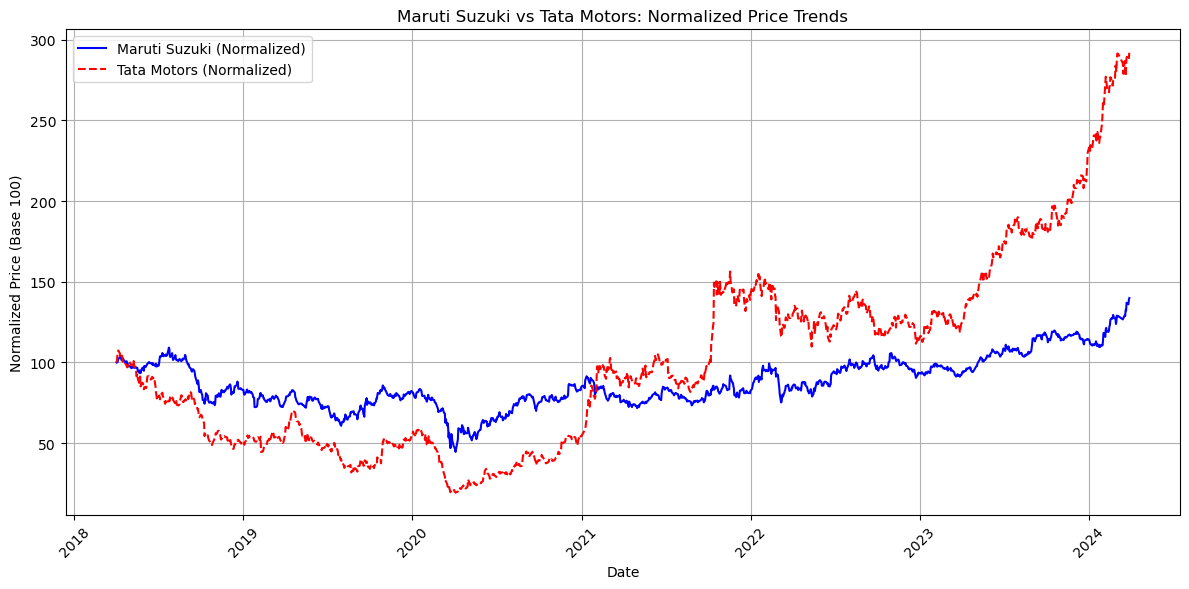

In [124]:
# Merge datasets on Date
merged_df = pd.merge(maruti[['Date', 'close']], tatamotor[['Date', 'close']], on='Date', suffixes=('_Maruti', '_Tatamotor'))

# Normalize prices (first value = 100)
merged_df['Maruti_Norm'] = (merged_df['close_Maruti'] / merged_df['close_Maruti'].iloc[0]) * 100
merged_df['Tata_Norm'] = (merged_df['close_Tatamotor'] / merged_df['close_Tatamotor'].iloc[0]) * 100

# Plot normalized prices
plt.figure(figsize=(12,6))
plt.plot(merged_df['Date'], merged_df['Maruti_Norm'], label='Maruti Suzuki (Normalized)', color='blue', linestyle='-')
plt.plot(merged_df['Date'], merged_df['Tata_Norm'], label='Tata Motors (Normalized)', color='red', linestyle='--')

# Formatting
plt.xlabel('Date')
plt.ylabel('Normalized Price (Base 100)')
plt.title('Maruti Suzuki vs Tata Motors: Normalized Price Trends')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

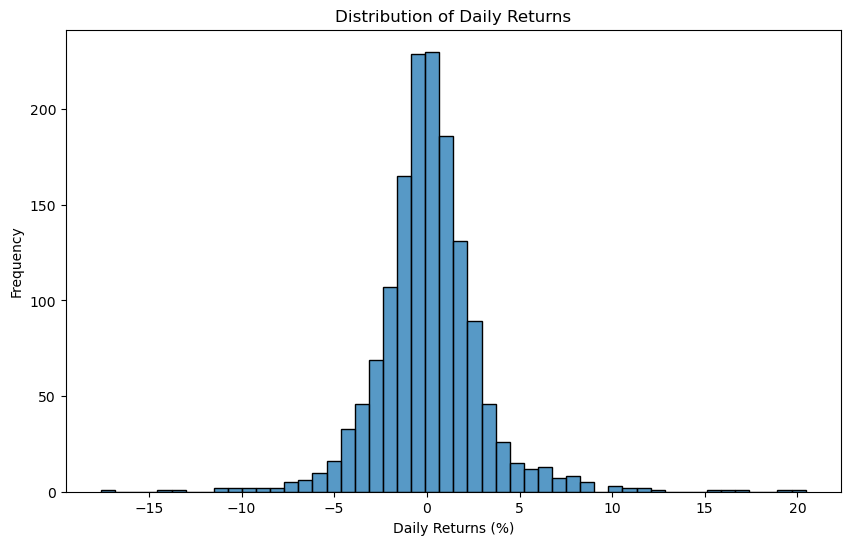

Key Statistics:
Average Daily Return: 0.11%
Daily Return Volatility: 2.90%
Maximum Daily Gain: 20.45%
Maximum Daily Loss: -17.58%
Total Trading Days: 1481


In [127]:
# Calculate daily returns
tatamotor['Daily_Return'] = tatamotor['close'].pct_change() * 100

# Create a histogram of daily returns
plt.figure(figsize=(10, 6))
sns.histplot(data=tatamotor['Daily_Return'].dropna(), bins=50)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns (%)')
plt.ylabel('Frequency')
plt.show()

# Print some key statistics
print("\
Key Statistics:")
print("Average Daily Return: {:.2f}%".format(tatamotor['Daily_Return'].mean()))
print("Daily Return Volatility: {:.2f}%".format(tatamotor['Daily_Return'].std()))
print("Maximum Daily Gain: {:.2f}%".format(tatamotor['Daily_Return'].max()))
print("Maximum Daily Loss: {:.2f}%".format(tatamotor['Daily_Return'].min()))
print("Total Trading Days:", len(tatamotor))

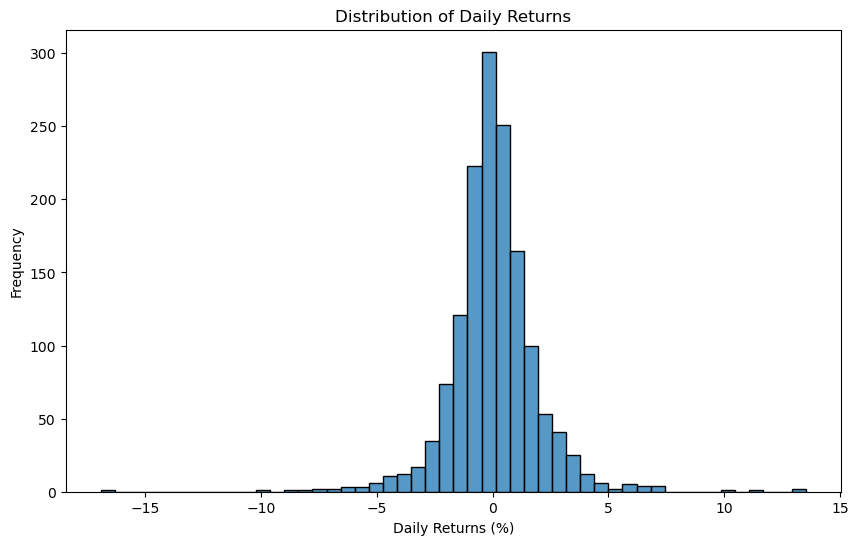

Key Statistics:
Average Daily Return: 0.04%
Daily Return Volatility: 1.91%
Maximum Daily Gain: 13.51%
Maximum Daily Loss: -16.91%
Total Trading Days: 1487


In [128]:
# Calculate daily returns
maruti['Daily_Return'] = maruti['close'].pct_change() * 100

# Create a histogram of daily returns
plt.figure(figsize=(10, 6))
sns.histplot(data=maruti['Daily_Return'].dropna(), bins=50)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns (%)')
plt.ylabel('Frequency')
plt.show()

# Print some key statistics
print("\
Key Statistics:")
print("Average Daily Return: {:.2f}%".format(maruti['Daily_Return'].mean()))
print("Daily Return Volatility: {:.2f}%".format(maruti['Daily_Return'].std()))
print("Maximum Daily Gain: {:.2f}%".format(maruti['Daily_Return'].max()))
print("Maximum Daily Loss: {:.2f}%".format(maruti['Daily_Return'].min()))
print("Total Trading Days:", len(maruti))

# Banking Sector (HDFC, SBI)

### Line Chart – Stock Price Movement

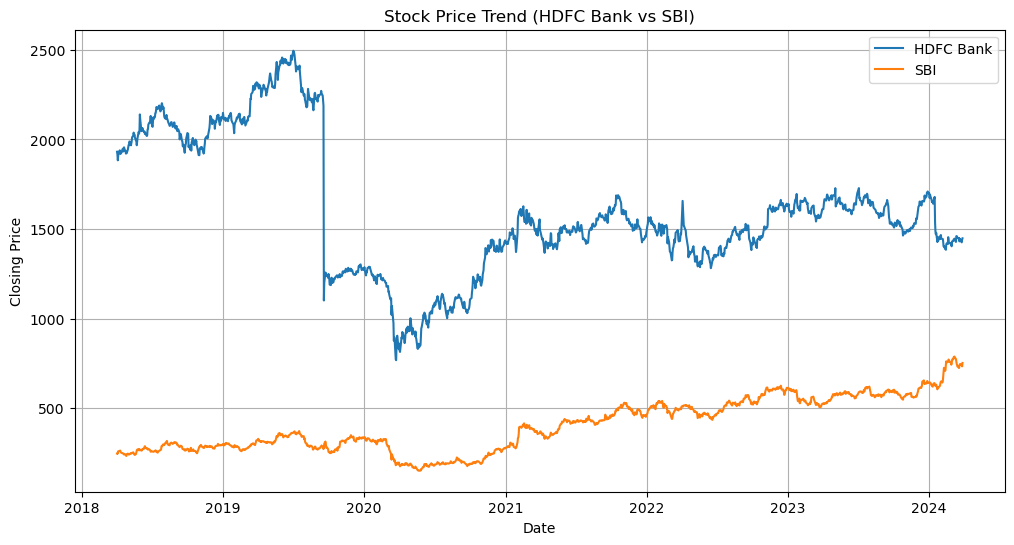

In [131]:
# df_hdfc = pd.read_csv("HDFC.csv", parse_dates=['Date'])
# df_sbi = pd.read_csv("SBI.csv", parse_dates=['Date'])

plt.figure(figsize=(12, 6))
plt.plot(hdfc_bank['Date'], hdfc_bank['close'], label="HDFC Bank", linestyle='-')
plt.plot(sbi_bank['Date'], sbi_bank['close'], label="SBI", linestyle='-')

plt.title("Stock Price Trend (HDFC Bank vs SBI)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid()
plt.show()

HDFC	
2019-09-18	EQ	2217.30	2224.15	
    	
2019-09-19	EQ	1099.90	1107.05	

##### Key Points to Cover:
- On September 19, 2019, HDFC Bank stock dropped from ₹2,217 to ₹1,099 due to a 2-for-1 stock split.
- A stock split increases the number of shares but reduces the price per share, keeping the total investment value unchanged.
- Purpose of Stock Splits: To improve liquidity and make shares more affordable.
- Takeaway: The drop was not due to a market crash, but a corporate action.

### Pie Chart – Volume Traded Comparison

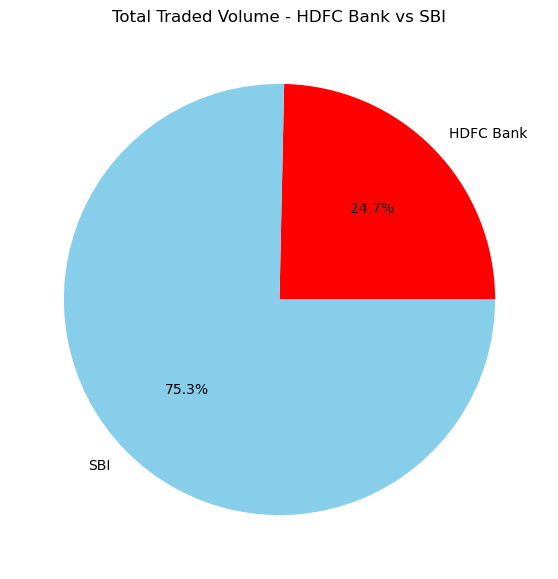

In [134]:
total_volume = {
    "HDFC Bank": hdfc_bank['VOLUME'].sum(),
    "SBI": sbi_bank['VOLUME'].sum()
}

plt.figure(figsize=(7, 7))
plt.pie(total_volume.values(), labels=total_volume.keys(), autopct='%1.1f%%', colors=['red', 'skyblue'])
plt.title("Total Traded Volume - HDFC Bank vs SBI")
plt.show()


# IT Sector (TCS, Infosys)

### Box Plot – Stock Price Distribution
### Helps identify volatility and outliers.

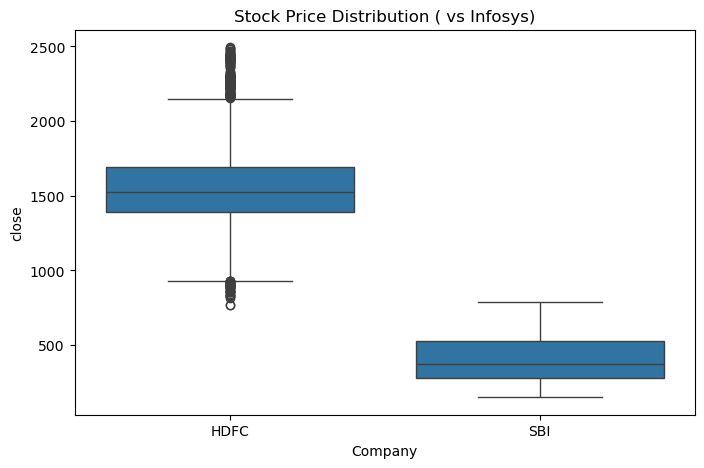

In [252]:
import seaborn as sns
df_it = pd.concat([hdfc_bank.assign(Company="HDFC"),sbi_bank.assign(Company="SBI")])

plt.figure(figsize=(8, 5))
sns.boxplot(x='Company', y='close', data=df_it)
plt.title("Stock Price Distribution ( vs Infosys)")
plt.show()

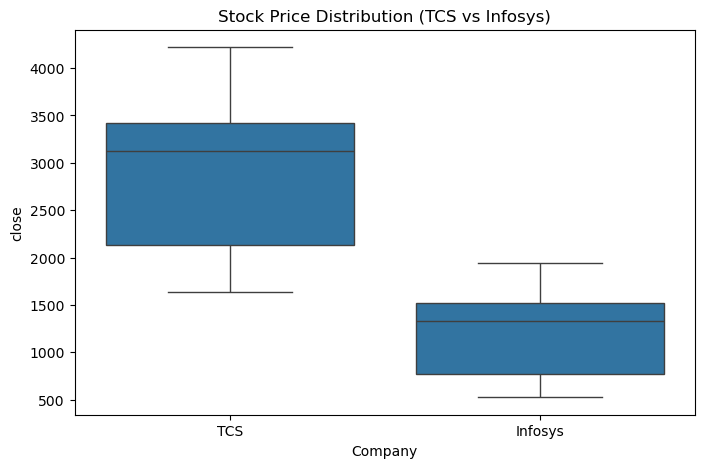

In [137]:
import seaborn as sns
df_it = pd.concat([TCS.assign(Company="TCS"),infosys.assign(Company="Infosys")])

plt.figure(figsize=(8, 5))
sns.boxplot(x='Company', y='close', data=df_it)
plt.title("Stock Price Distribution (TCS vs Infosys)")
plt.show()

### Scatter Plot – Closing Price vs Volume

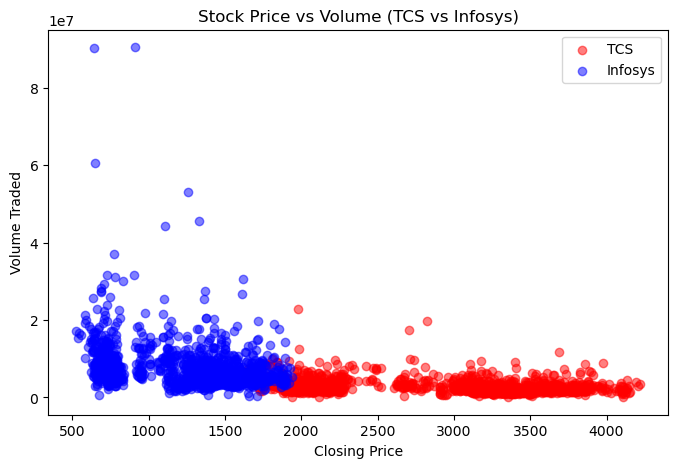

In [139]:
plt.figure(figsize=(8, 5))
plt.scatter(TCS['close'], TCS['VOLUME'], label="TCS", alpha=0.5, color='red')
plt.scatter(infosys['close'],infosys['VOLUME'], label="Infosys", alpha=0.5, color='blue')

plt.title("Stock Price vs Volume (TCS vs Infosys)")
plt.xlabel("Closing Price")
plt.ylabel("Volume Traded")
plt.legend()
plt.show()

### Insight: Helps understand whether higher prices lead to more trading.

# Pharma Sector (Sun Pharma, Dr. Reddy’s)
### Histogram – Stock Price Distribution

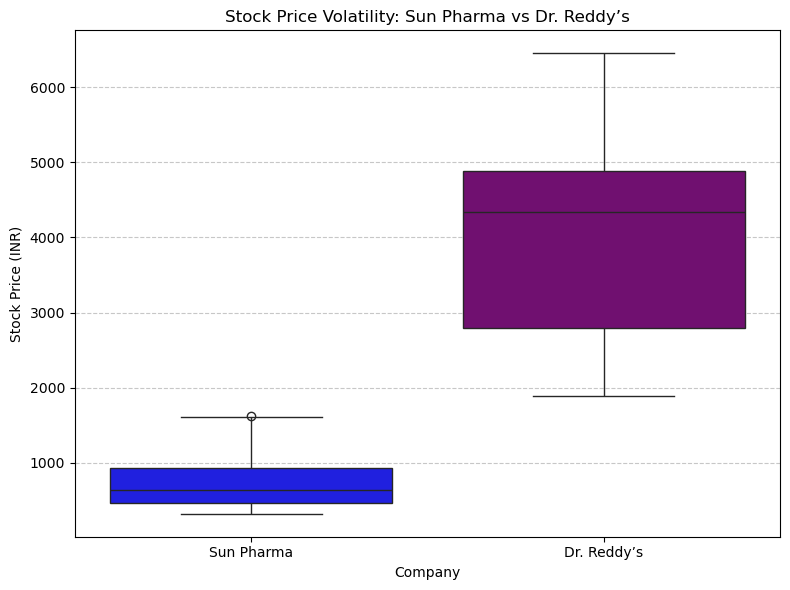

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column to indicate the company
sunpharma['Company'] = 'Sun Pharma'
reddylab_data['Company'] = 'Dr. Reddy’s'

# Combine both datasets
pharma_combined = pd.concat([sunpharma, reddylab_data])

# Plot Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Company', y='close', data=pharma_combined, palette=['blue', 'purple'])

# Labeling the chart
plt.title('Stock Price Volatility: Sun Pharma vs Dr. Reddy’s')
plt.xlabel('Company')
plt.ylabel('Stock Price (INR)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### Insight: Shows how prices are distributed.

# FMCG Sector (HUL, ITC)
### Line Chart – Price Comparison


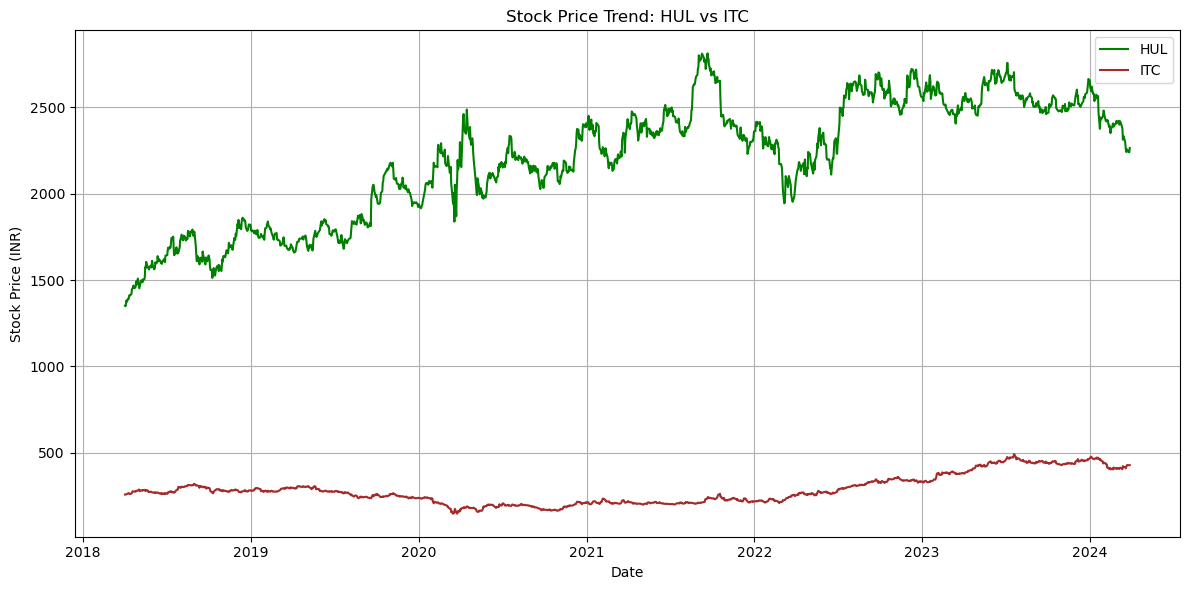

In [146]:
HUL['Date'] = pd.to_datetime(HUL['Date'])
ITC['Date'] = pd.to_datetime(ITC['Date'])

# Plot stock price trends
plt.figure(figsize=(12, 6))
plt.plot(HUL['Date'], HUL['close'], label='HUL', color='green')
plt.plot(ITC['Date'], ITC['close'], label='ITC', color='brown')

# Labeling the chart
plt.title('Stock Price Trend: HUL vs ITC')
plt.xlabel('Date')
plt.ylabel('Stock Price (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


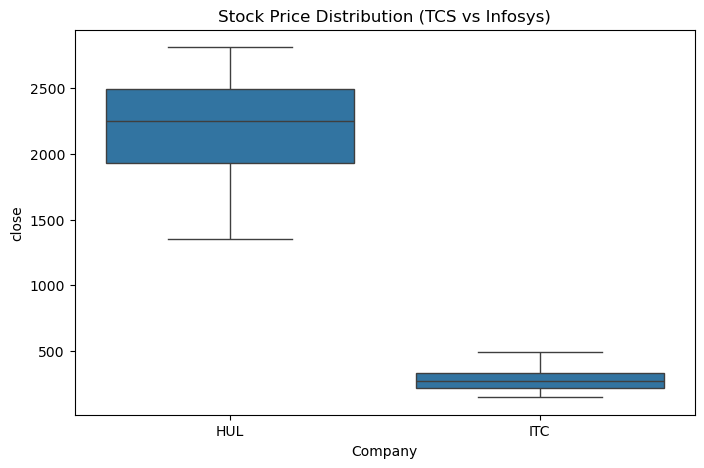

In [260]:
import seaborn as sns
df_it = pd.concat([HUL.assign(Company="HUL"),ITC.assign(Company="ITC")])

plt.figure(figsize=(8, 5))
sns.boxplot(x='Company', y='close', data=df_it)
plt.title("Stock Price Distribution (TCS vs Infosys)")
plt.show()